In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("Customer_churn.csv")

In [3]:
df=pd.DataFrame(data=df1)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(7043, 21)

In [8]:
df.ndim

2

In [9]:
df.size

147903

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Observation Shows:

1. O1 float Column 
2. 02 Interger Column
3. 18 object Columns

- Space usage: 1.1+ MB

# About Columns.

 0.   customerID       Customer Indentification Number. 
 1.   gender           Male/Female
 2.   SeniorCitizen    If Person is Senior Citizen.
 3.   Partner          If Person Having Parter.
 4.   Dependents       If They Have dependents. 
 5.   Tenure           Term of Years.
 6.   PhoneService     Customer Having Phone Service. 
 7.   MultipleLines    Customer Using Multiple Lines
 8.   InternetService  Customer Using Internet Service. 
 9.   OnlineSecurity   Customer Using Online Security.
 10.  OnlineBackup     Customer Having Online Backup.
 11.  DeviceProtection Customer Having Device protection.
 12.  TechSupport      Customer Using TechSupport.
 13.  StreamingTV      Customer Using Streaming Tv. 
 14.  StreamingMovies  Customer Using Streaming Movies. 
 15.  Contract         Contact Terms Month or Year
 16.  PaperlessBilling Custommer Opted For Paperless Billing. 
 17.  PaymentMethod    Methord Used for Payment.
 18.  MonthlyCharges   Monthly Charges For Payment.
 19.  TotalCharges     Total Charges For Payment.
 20.  Churn            Churn is a quantifiable rate of change that occurs over a specified amount of time.

# Checking Null Values

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Checking Null Values in Visualization:

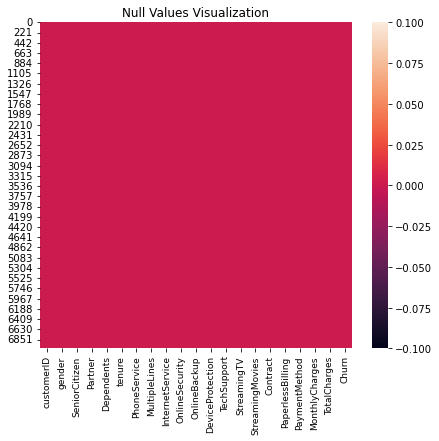

In [12]:
plt.figure(figsize=(7,6))
sns.heatmap(df.isnull())
plt.xticks(rotation=90,fontsize=9)
plt.title("Null Values Visualization",fontsize=12)
plt.show()

# Unique Values

In [13]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Checking Unique Values in Categorical Columns

In [14]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i,'\n')
        print(df[i].unique())
        print("**"*20)

customerID 

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
****************************************
gender 

['Female' 'Male']
****************************************
Partner 

['Yes' 'No']
****************************************
Dependents 

['No' 'Yes']
****************************************
PhoneService 

['No' 'Yes']
****************************************
MultipleLines 

['No phone service' 'No' 'Yes']
****************************************
InternetService 

['DSL' 'Fiber optic' 'No']
****************************************
OnlineSecurity 

['No' 'Yes' 'No internet service']
****************************************
OnlineBackup 

['Yes' 'No' 'No internet service']
****************************************
DeviceProtection 

['No' 'Yes' 'No internet service']
****************************************
TechSupport 

['No' 'Yes' 'No internet service']
****************************************
StreamingTV 

['No' 'Yes' 'No internet service']


In [15]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

## Checking If any Unique Values in Numerical or Float Column

In [16]:
for i in df.columns:
    if df[i].dtypes=='int64':
        print("Numerical Column Shows","\n")
        print(i,"\n",df[i].unique())
        print("**"*20,"\n")

Numerical Column Shows 

SeniorCitizen 
 [0 1]
**************************************** 

Numerical Column Shows 

tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************** 



### Float Values

In [17]:
for i in df.columns:
    if df[i].dtypes=='float64':
        print(i,'\n')
        print(df[i].unique())
        print("**"*20)

MonthlyCharges 

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
****************************************


In [18]:
df['MonthlyCharges'].is_unique

False

#### Here Total Charges Column Shows Being Numerical Values shows Category Values.

In [19]:
df[df['TotalCharges']==' '] # Empty rows in Total Charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
# replacing those with np.nan
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [21]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
#convert the data from column TotalCharges to float type
df['TotalCharges']=df['TotalCharges'].astype(float)

In [23]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

## Checking Duplicated Column

In [24]:
df[df.duplicated()].sum()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [25]:
# Deleting customerID columns, as that doesn't add any values to target variable for prediction.
df.drop(['customerID'],axis=1,inplace=True)

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking Values after Normal Imputation:

In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

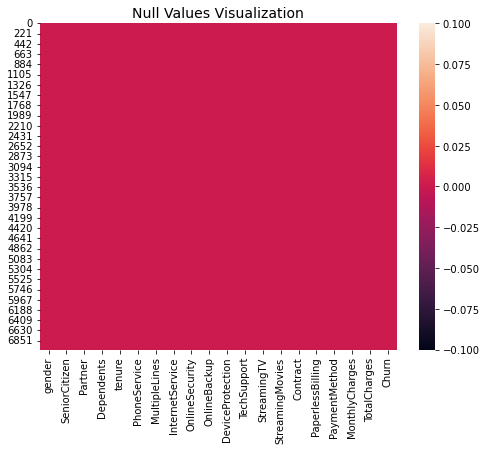

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.xticks(rotation=90,fontsize=10)
plt.title("Null Values Visualization",fontsize=14)
plt.show()

# EDA (Exploratory Data Analysis)

# Uni-variate Analysis

Gender Counts 
 Male      3555
Female    3488
Name: gender, dtype: int64


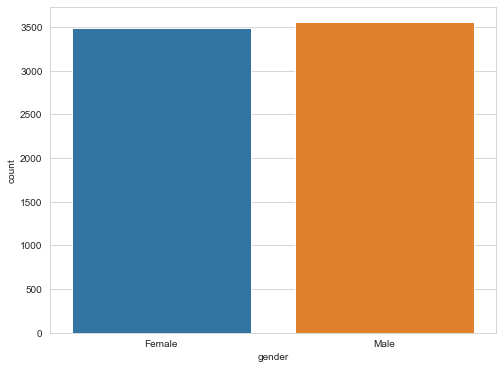

In [29]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='gender')
print("Gender Counts \n",df['gender'].value_counts())

Total Gender Counts 
- Male    = 3555
- Female  = 3488

### Maximum are Male User followed by Female User

Senior Citizen Counts 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


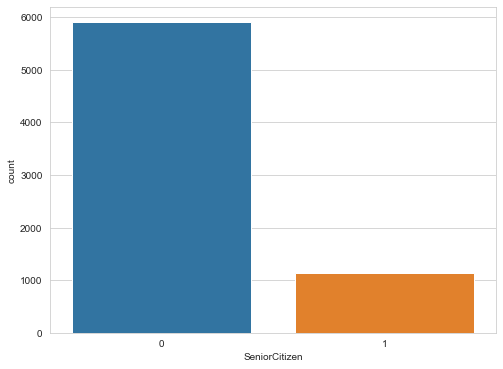

In [30]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='SeniorCitizen')
print("Senior Citizen Counts \n",df['SeniorCitizen'].value_counts())

Senior Citizen Counts 
- 0 Shows   5901
- 1 Shows   1142

Partner Counts 
 No     3641
Yes    3402
Name: Partner, dtype: int64


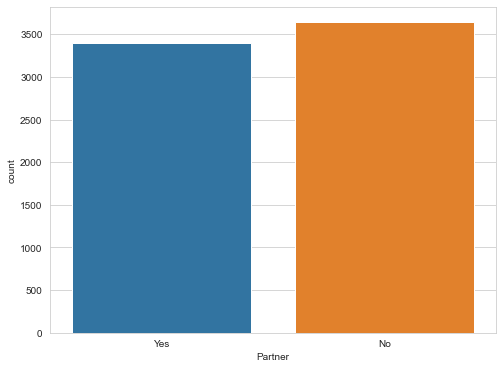

In [31]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Partner')
print("Partner Counts \n",df['Partner'].value_counts())

Partner Counts 
- Without Partner Counts are 3641, With Partner counts are 3402

### Maximum Visiters are Without Partners

Dependents Counts 
 No     4933
Yes    2110
Name: Dependents, dtype: int64


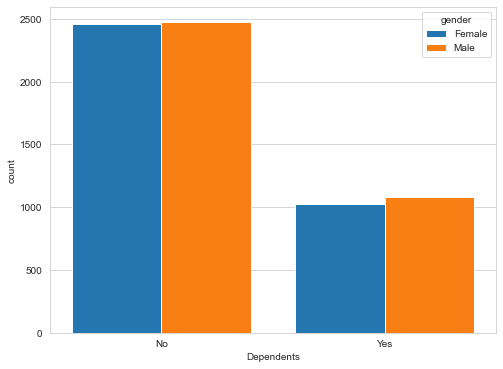

In [32]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Dependents',hue='gender',palette=None,saturation=0.95,dodge=True)
print("Dependents Counts \n",df['Dependents'].value_counts())

Dependents Counts Shows that:
    
- Non-Dependents are 4933, Dependents Visiting are 2110

#### Dependents are Maximum Male User

Top 5 Tenure Counts 
 1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64


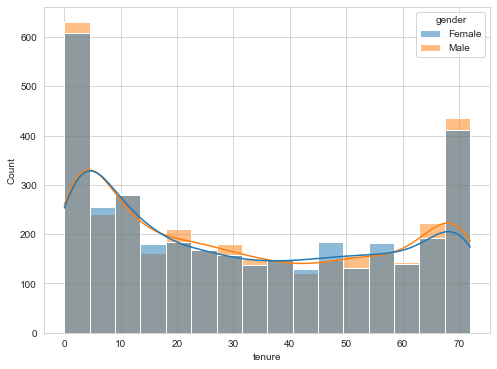

In [33]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.histplot(data=df,x='tenure',hue='gender',kde=True)
print("Top 5 Tenure Counts \n",df['tenure'].value_counts()[:5])

Top 5 Tenure Counts 

- 01     613
- 72    362
- 02     238
- 03     200
- 04     176

### Maximum Frequency lies between 0 to 5 followed by 65 to 70

PhoneService Counts 
 Yes    6361
No      682
Name: PhoneService, dtype: int64


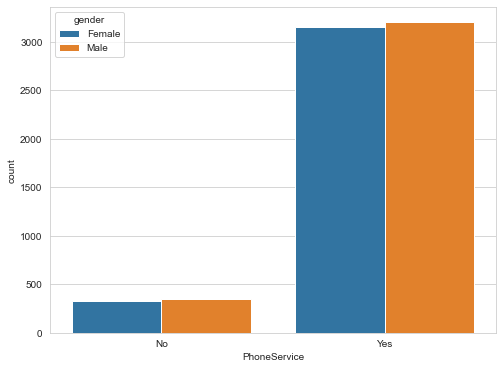

In [34]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PhoneService',hue='gender')
print("PhoneService Counts \n",df['PhoneService'].value_counts())

### Person counts 6361 Using Phone Service, Person Not using Phone Services are 682

MultipleLines Counts 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


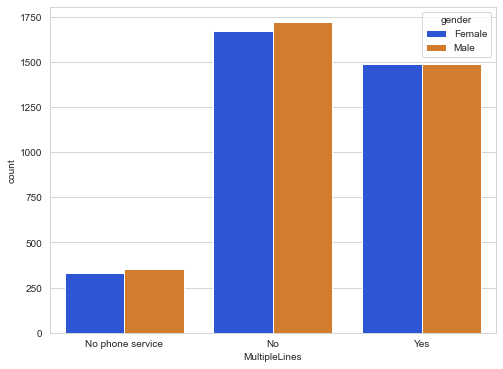

In [35]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")

sns.countplot(data=df,x='MultipleLines',hue='gender',palette='bright',saturation=0.65)
print("MultipleLines Counts \n",df['MultipleLines'].value_counts())

MultipleLines Counts 

- No                  3390
- Yes                 2971
- No phone service     682

### Maximum users are non user of MultipleLines. Maximum Male uses Multiple lines. 

InternetService Counts 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


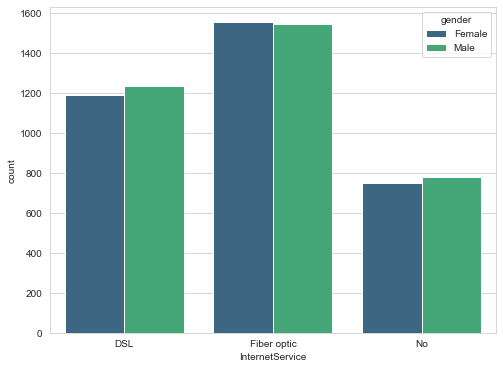

In [36]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")

sns.countplot(data=df,x='InternetService',hue='gender',palette='viridis')
print("InternetService Counts \n",df['InternetService'].value_counts())

Internet Service Users Countss 

- Fiber optic    3096
- DSL            2421
- No             1526

### Maximum user of FIber Optic followed by DSL, Both Male and Female Uses Internet Services 

OnlineSecurity Counts 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


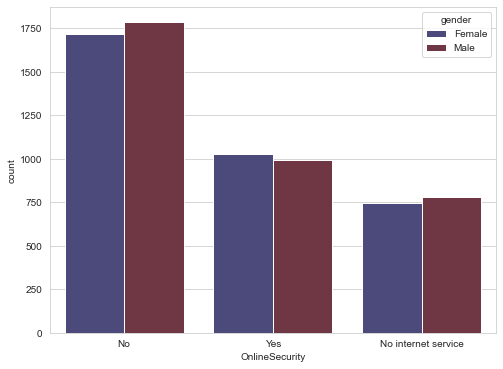

In [37]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineSecurity',palette='icefire',hue='gender')
print("OnlineSecurity Counts \n",df['OnlineSecurity'].value_counts())

User Using Online Security Shows 
- Non User               3498
- User                   2019
- No internet User       1526

### Maximum are Non User of online Security, Maximum Female User are Online Security User

OnlineBackup Counts 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


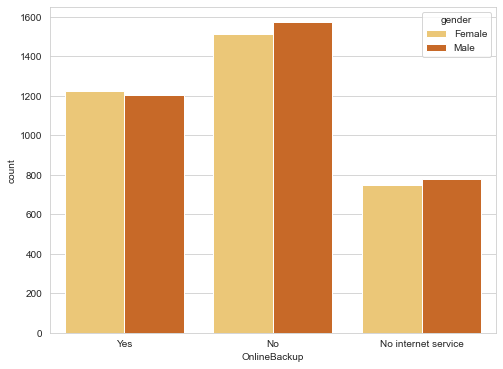

In [38]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineBackup',palette='YlOrBr',hue='gender')
print("OnlineBackup Counts \n",df['OnlineBackup'].value_counts())

OnlineBackup Counts

- Non User                 3088
- User Using Online Backup 2429
- No internet User         1526

### Maximum User are with No Online Backup, Maximum Female uses Online Backup 

DeviceProtection Counts 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


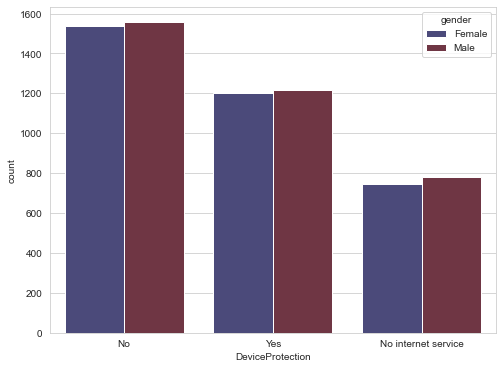

In [39]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='DeviceProtection',palette='icefire',hue='gender')
print("DeviceProtection Counts \n",df['DeviceProtection'].value_counts())

- Non User of Device Protects     3095
- User of Device Protects         2422
- No internet Service User        1526

### Maximum user with No and Yes Device protection is Male

TechSupport Users Counts 
 No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


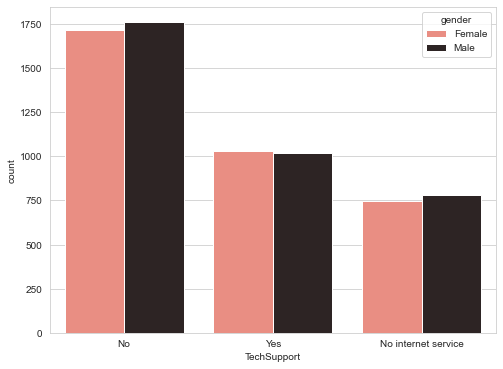

In [40]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='TechSupport',palette='dark:salmon_r',hue='gender')
print("TechSupport Users Counts \n",df['TechSupport'].value_counts())

TechSupport

- Non Tech Support Users   3473
- Tech Support Users       2044
- No internet service      1526

#### Male and Female User Both Uses TechSupport, Uses of Tech Support More By Female

StreamingTV Users Counts 
 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


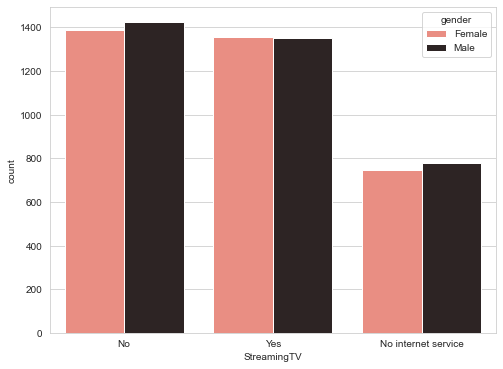

In [41]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingTV',palette='dark:salmon_r',hue='gender')
print("StreamingTV Users Counts \n",df['StreamingTV'].value_counts())


- Non StreamingTV user      2810
- StreamingTV user          2707
- No internet service user  1526

#### Both Male and Female both uses Streaming TV. Maximum Non user are Male

Streaming Movies Users Counts 
 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


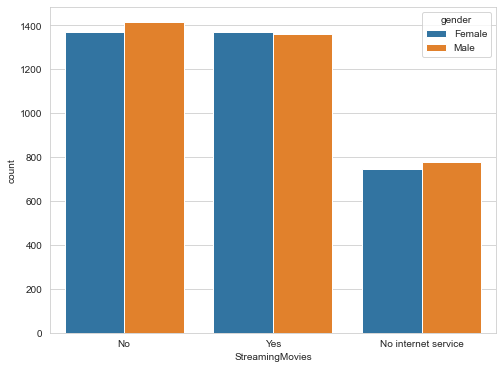

In [42]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingMovies',hue='gender')
print("Streaming Movies Users Counts \n",df['StreamingMovies'].value_counts())

Streaming Movies Users Counts 
- Non Streaming Movies User    2785
- Streaming Movies User        2732
- No internet service User     1526

### Maximum Streaming Movies are used by Male as well as Female, Maximum NONE user are Male

Contract Users Counts 
 Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


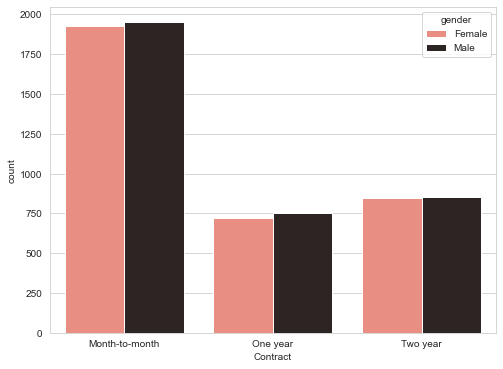

In [43]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Contract',palette='dark:salmon_r',hue='gender')
print("Contract Users Counts \n",df['Contract'].value_counts())

- Month-to-month Contract Users   3875
- Two year Contract Users         1695
- One year Contract Users         1473

#### Maximum One-year and Month to Month User are Male, Two Years contact are maximum by Male

Paperless Billing Users Counts 
 Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


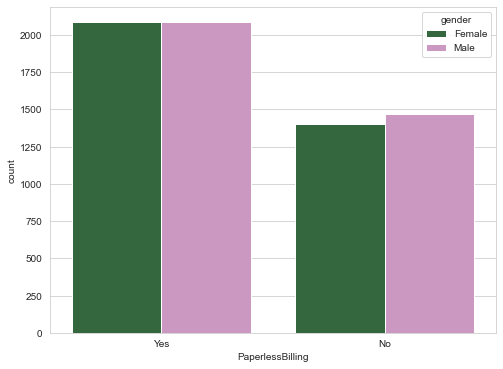

In [44]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PaperlessBilling',palette='cubehelix',hue='gender')
print("Paperless Billing Users Counts \n",df['PaperlessBilling'].value_counts())

- Paperless Billing Users       4171
- No Paperless Billing Users    2872

#### Both Male and Female User are Paperless billing, None Paperless Billing User are maximum male

In [45]:
df['TotalCharges'].value_counts()

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
19.650000       8
45.300000       7
19.550000       7
20.150000       6
20.250000       6
19.450000       6
20.300000       5
20.450000       5
19.850000       4
69.900000       4
20.400000       4
70.600000       4
19.200000       4
69.650000       4
44.000000       4
44.400000       4
20.500000       4
49.900000       4
74.700000       4
19.300000       4
19.950000       4
19.500000       4
75.300000       4
50.150000       4
20.350000       4
69.600000       4
19.400000       4
69.950000       4
19.250000       3
70.450000       3
1284.200000     3
69.250000       3
74.300000       3
20.900000       3
220.450000      3
20.550000       3
69.100000       3
20.100000       3
305.550000      3
50.600000       3
74.600000       3
20.000000       3
45.850000       3
44.750000       3
70.150000       3
75.350000       3
19.100000       3
74.900000       3
86.050000       3
79.550000       3
74.350000 

Total Charges Users Counts 
 2283.3004408418697


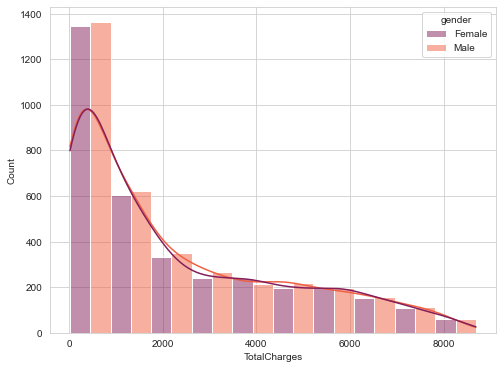

In [46]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.histplot(data=df,x='TotalCharges',palette='rocket',hue='gender',kde=True,multiple='dodge',bins=10)
print("Total Charges Users Counts \n",df['TotalCharges'].mean())

#### Maximum User paying total Charges are between is approx 100, Maximum Buyers pays Total Charges 0 to 2000.

Per Person Sale Stands 2283.3004408418697

Total Charges Users Counts 
 1400.55


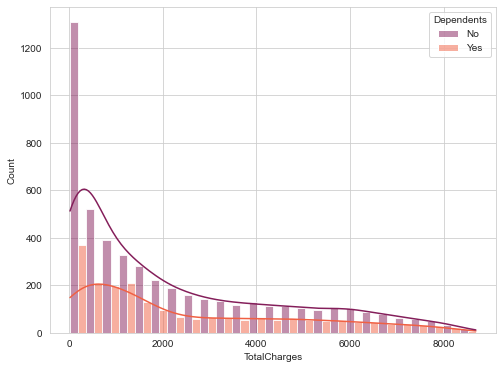

In [47]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.histplot(data=df,x='TotalCharges',palette='rocket',hue='Dependents',kde=True,multiple='dodge')
print("Total Charges Users Counts \n",df['TotalCharges'].median())

#### Maximum Non Dependents Pays Total Charges 

Total Charges Users Counts 
 1400.55


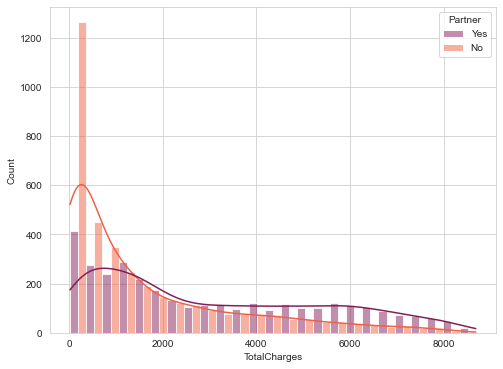

In [48]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.histplot(data=df,x='TotalCharges',palette='rocket',hue='Partner',kde=True,multiple='dodge')
print("Total Charges Users Counts \n",df['TotalCharges'].median())

# Bi-Variate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

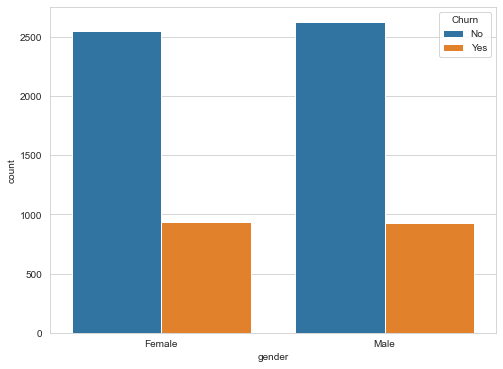

In [49]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='gender',hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

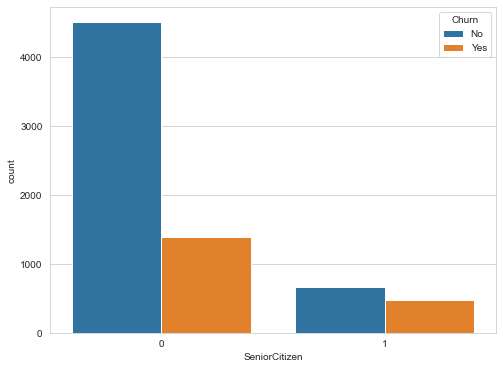

In [50]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')

<AxesSubplot:xlabel='Partner', ylabel='count'>

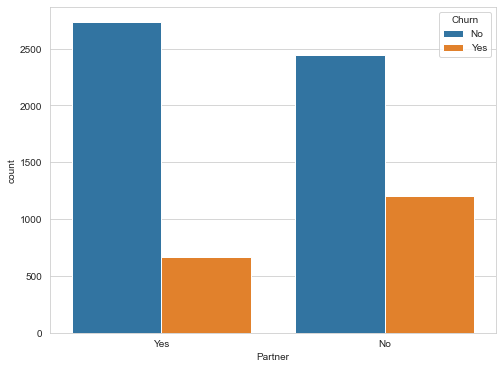

In [51]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Partner',hue='Churn')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

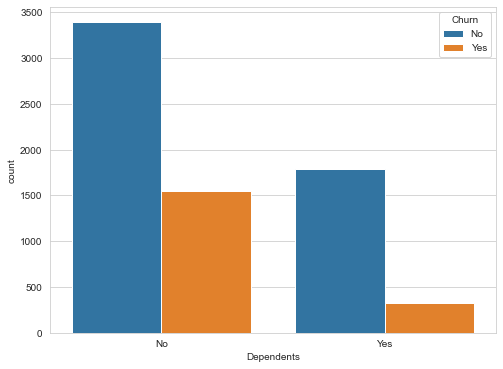

In [52]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Dependents',hue='Churn')

<AxesSubplot:xlabel='count', ylabel='tenure'>

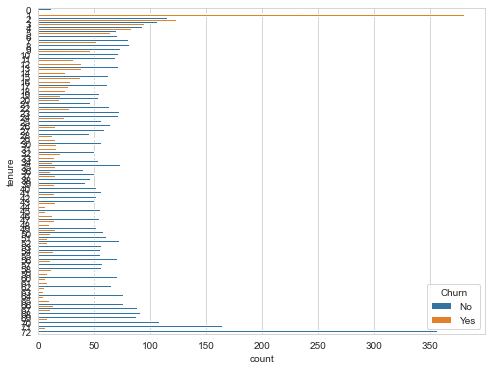

In [53]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,y='tenure',hue='Churn')

Churn is more for those tenure is more, Customer Attrition is less for less tenure people

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

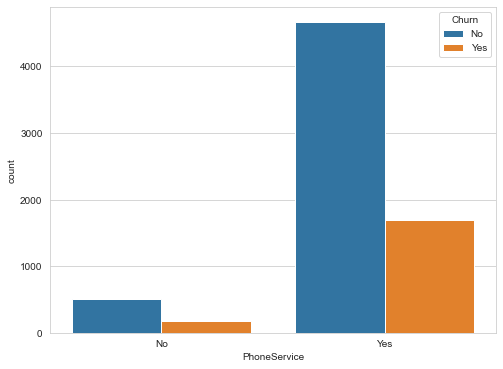

In [54]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PhoneService',hue='Churn')

Customer Attrition is more who uses Phone Service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

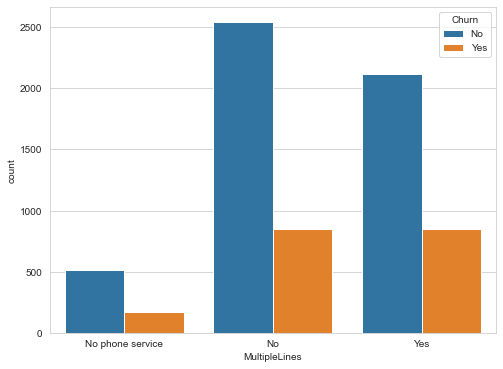

In [55]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='MultipleLines',hue='Churn')

Graph Customer Attrition is more for those who uses MultipleLines and Who don't use MultipleLines Service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

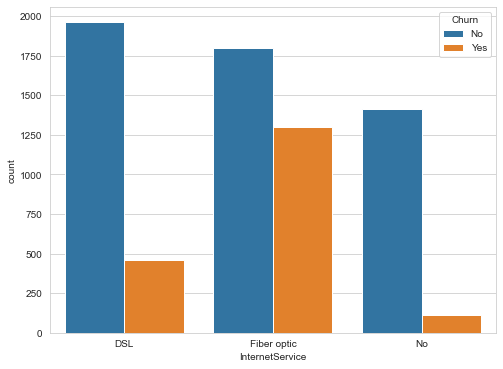

In [56]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='InternetService',hue='Churn')

- Curn is More forFiber optics and DSL 

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

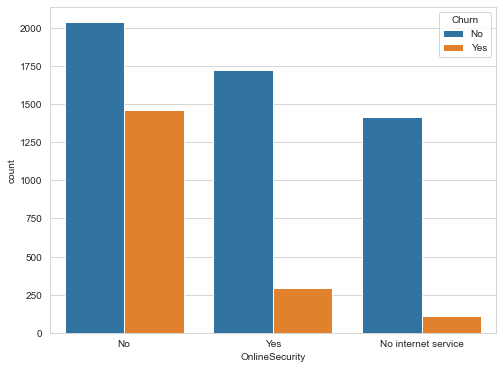

In [57]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')

- Graph shows less attrition for those who uses Online Security.Maximum Churn lies from the on who uses No Online Security.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

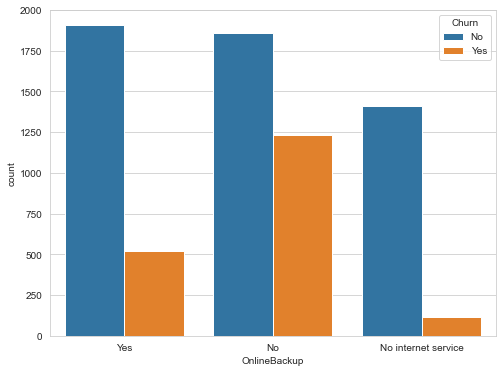

In [58]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='OnlineBackup',hue='Churn')

- Churn Customers are mainly who don't use Online Backup, the one who uses Online Backup is very less

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

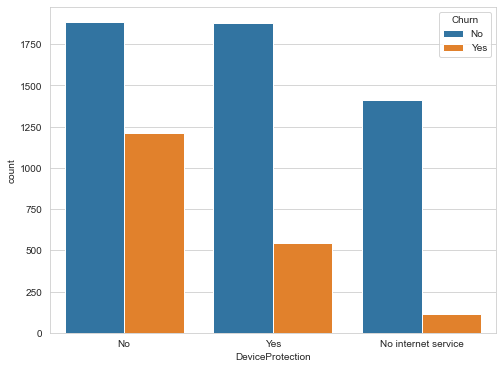

In [59]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='DeviceProtection',hue='Churn')

- Churn Customers are mainly who don't uses Online Device Protection, The one who uses Device Protection is very less

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

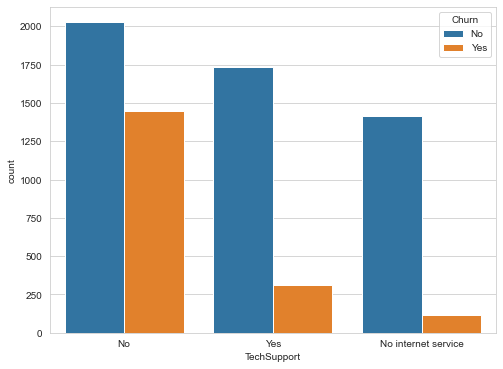

In [60]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='TechSupport',hue='Churn')

- Churn Customers are mainly who don't uses TechSupport, The one who uses Tech Support is very less

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

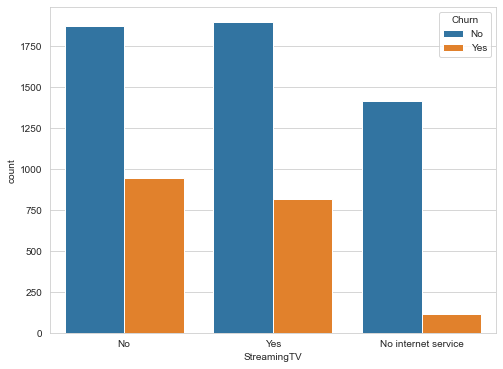

In [61]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingTV',hue='Churn')

- Churn Customers are mainly who don't have Streaming TV, followed by one who uses Streaming TV. Rest with no internet connection

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

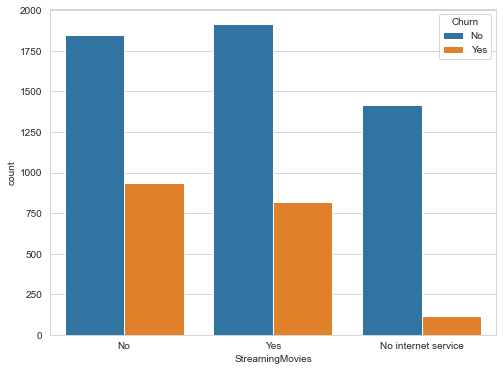

In [62]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='StreamingMovies',hue='Churn')

- Churn Customers are mainly who don't have Streaming Movies followed by one who uses Streaming Movies. Rest with no internet connection

<AxesSubplot:xlabel='Contract', ylabel='count'>

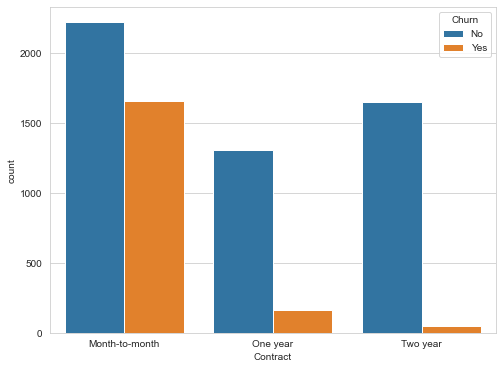

In [63]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='Contract',hue='Churn')

Maximum Customer churn is in Month to Month followed by one-year Contact two years contracts lies very least

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

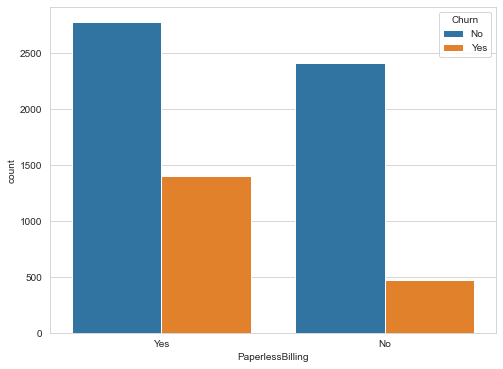

In [64]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')

Maximum prefer Paperless Billing. followed by NO Paperless Billing

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

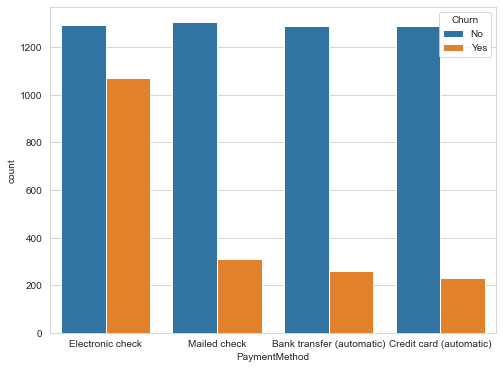

In [65]:
plt.figure(figsize=(8,6))
sns.set_style ("whitegrid")
sns.countplot(data=df,x='PaymentMethod',hue='Churn')

- Maximum Customer Churn prefer Electronic check to pay bills followed by Mailed check, BankTransfer is less and credit Card is also less on compare

## Checking Relationship with Target Variable

# Using Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

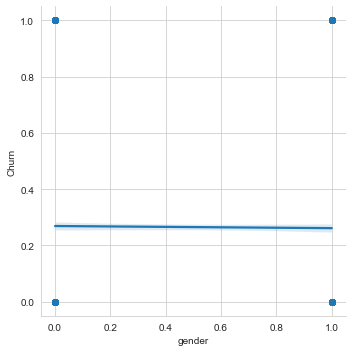

In [67]:
sns.lmplot(data=df,x='gender',y='Churn')

No good relation with gender

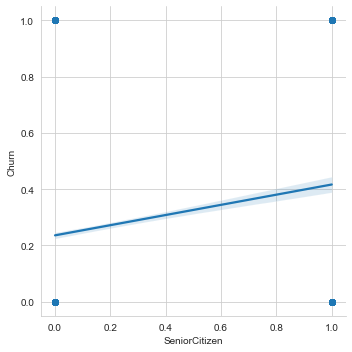

In [68]:
sns.lmplot(data=df,x='SeniorCitizen',y='Churn')

Non Senior Citizen churn is more

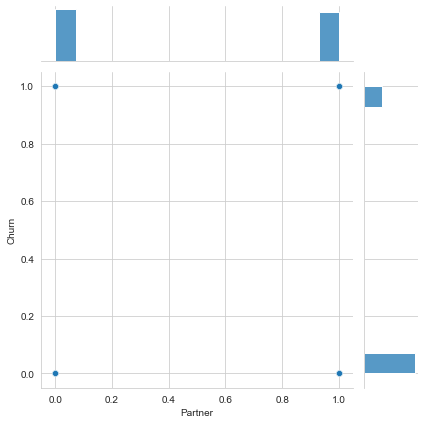

In [69]:
sns.jointplot(data=df,x='Partner',y='Churn')

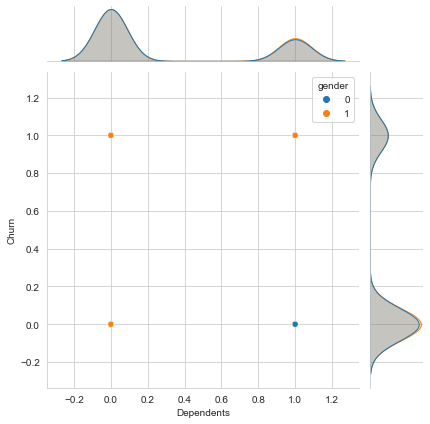

In [70]:
sns.jointplot(data=df,x='Dependents',y='Churn',hue='gender')

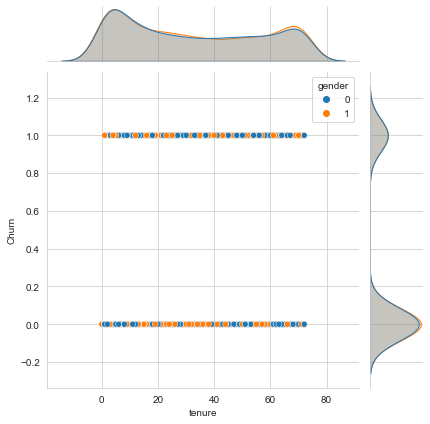

In [71]:
sns.jointplot(data=df,x='tenure',y='Churn',hue='gender')

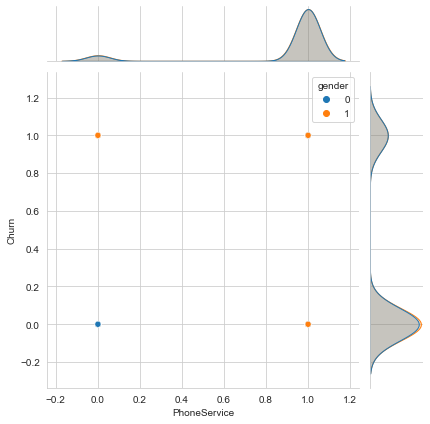

In [72]:
sns.jointplot(data=df,x='PhoneService',y='Churn',hue='gender')

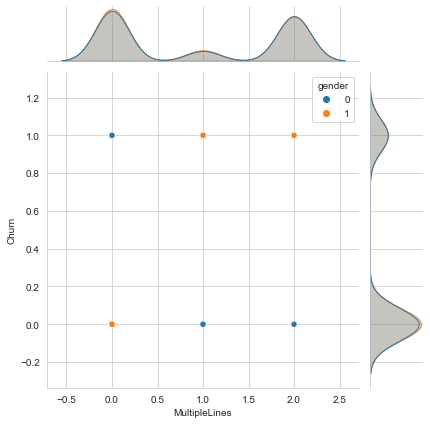

In [73]:
sns.jointplot(data=df,x='MultipleLines',y='Churn',hue='gender')

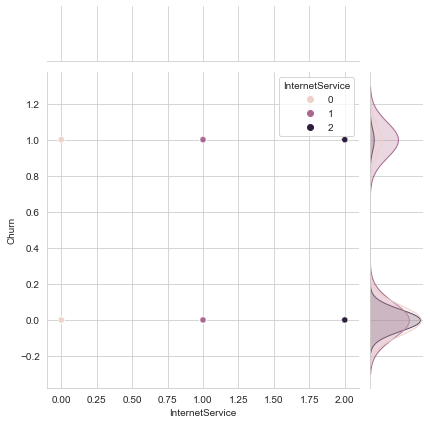

In [74]:
sns.jointplot(data=df,x='InternetService',y='Churn',hue='InternetService')

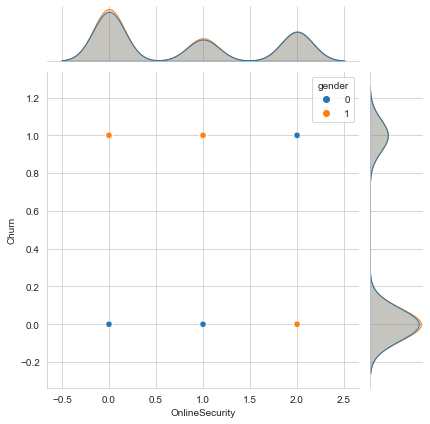

In [75]:
sns.jointplot(data=df,x='OnlineSecurity',y='Churn',hue='gender')

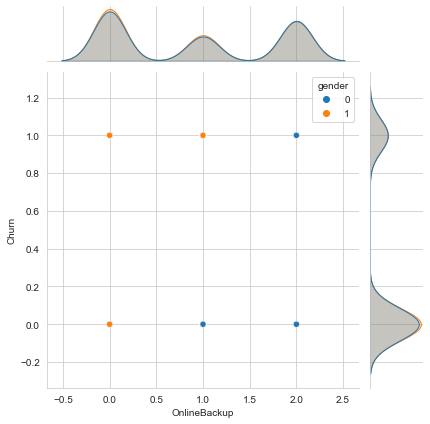

In [76]:
sns.jointplot(data=df,x='OnlineBackup',y='Churn',hue='gender')

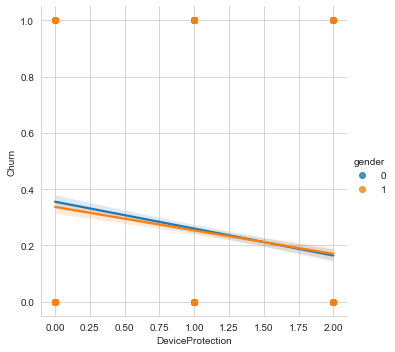

In [77]:
sns.lmplot(data=df,x='DeviceProtection',y='Churn',hue='gender')

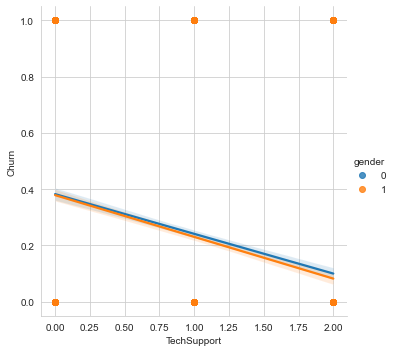

In [78]:
sns.lmplot(data=df,x='TechSupport',y='Churn',hue='gender')

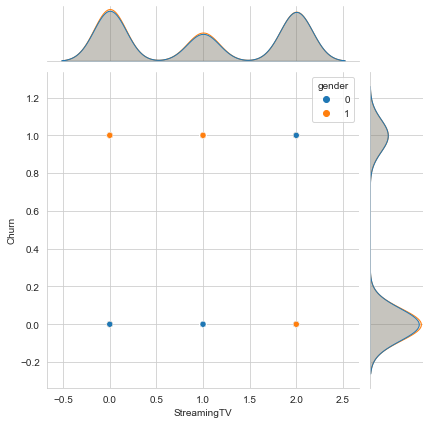

In [79]:
sns.jointplot(data=df,x='StreamingTV',y='Churn',hue='gender')

<AxesSubplot:xlabel='StreamingMovies', ylabel='Churn'>

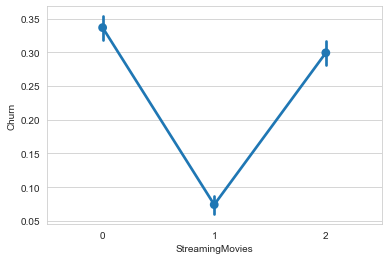

In [80]:
sns.pointplot(data=df,x='StreamingMovies',y='Churn')

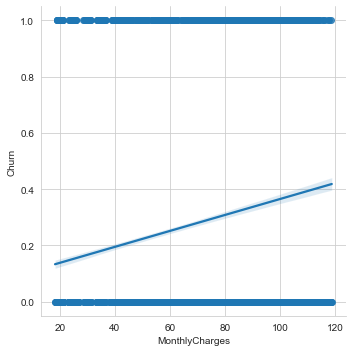

In [81]:
sns.lmplot(data=df,x='MonthlyCharges',y='Churn')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

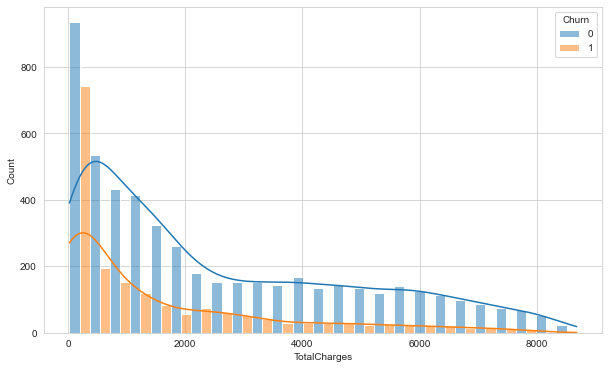

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='TotalCharges',hue='Churn',kde=True, multiple='dodge')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

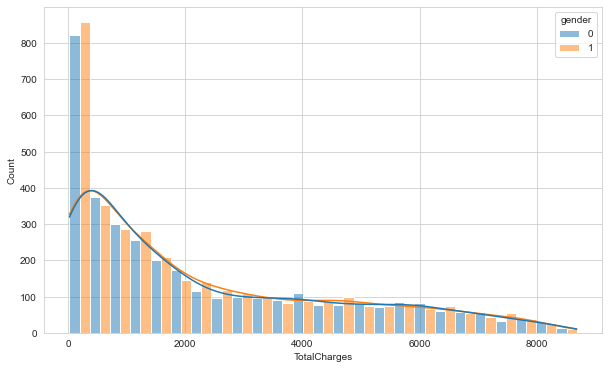

In [83]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,hue='gender',x='TotalCharges',kde=True, multiple='dodge')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

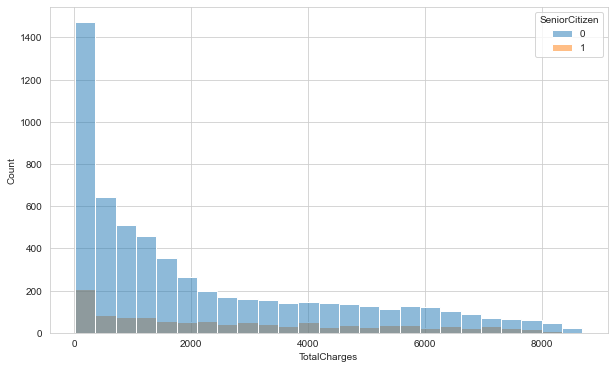

In [84]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,hue='SeniorCitizen',x='TotalCharges')

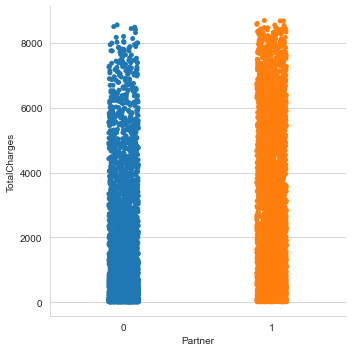

In [85]:
sns.catplot(data=df,x='Partner',y='TotalCharges')

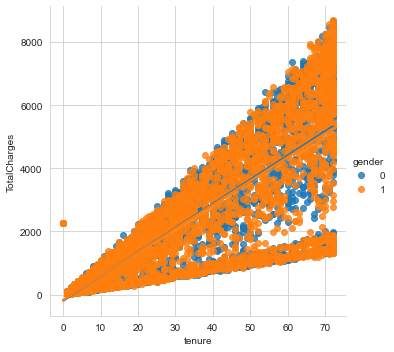

In [86]:
sns.lmplot(data=df,x='tenure',y='TotalCharges',hue='gender')

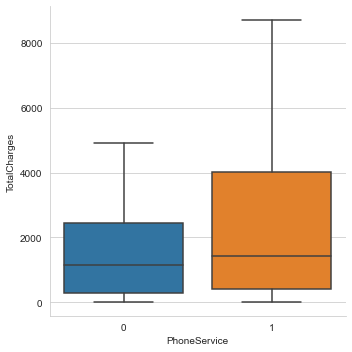

In [87]:
sns.catplot(data=df,x='PhoneService',y='TotalCharges',kind='box')

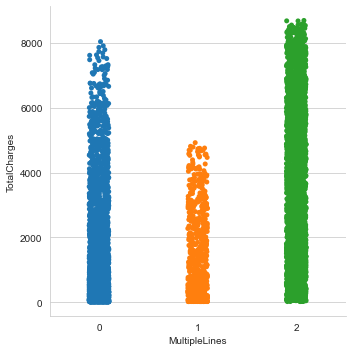

In [88]:
sns.catplot(data=df,x='MultipleLines',y='TotalCharges',kind='strip')

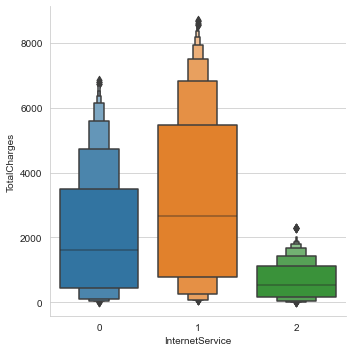

In [89]:
sns.catplot(data=df,x='InternetService',y='TotalCharges',kind='boxen')

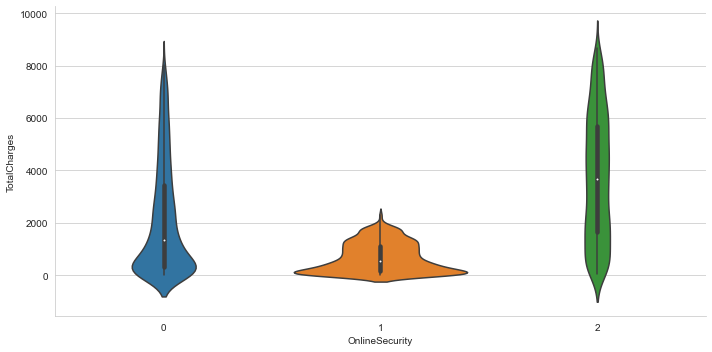

In [90]:
sns.catplot(data=df,x='OnlineSecurity',y='TotalCharges',kind='violin',aspect=2)

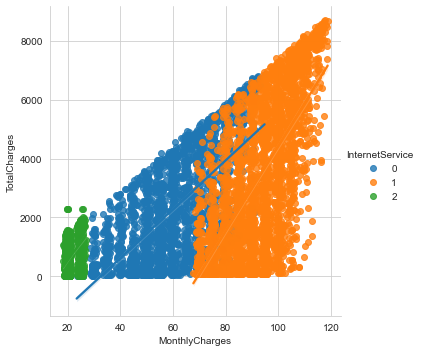

In [91]:
sns.lmplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='InternetService')

# Multivariate Analysis

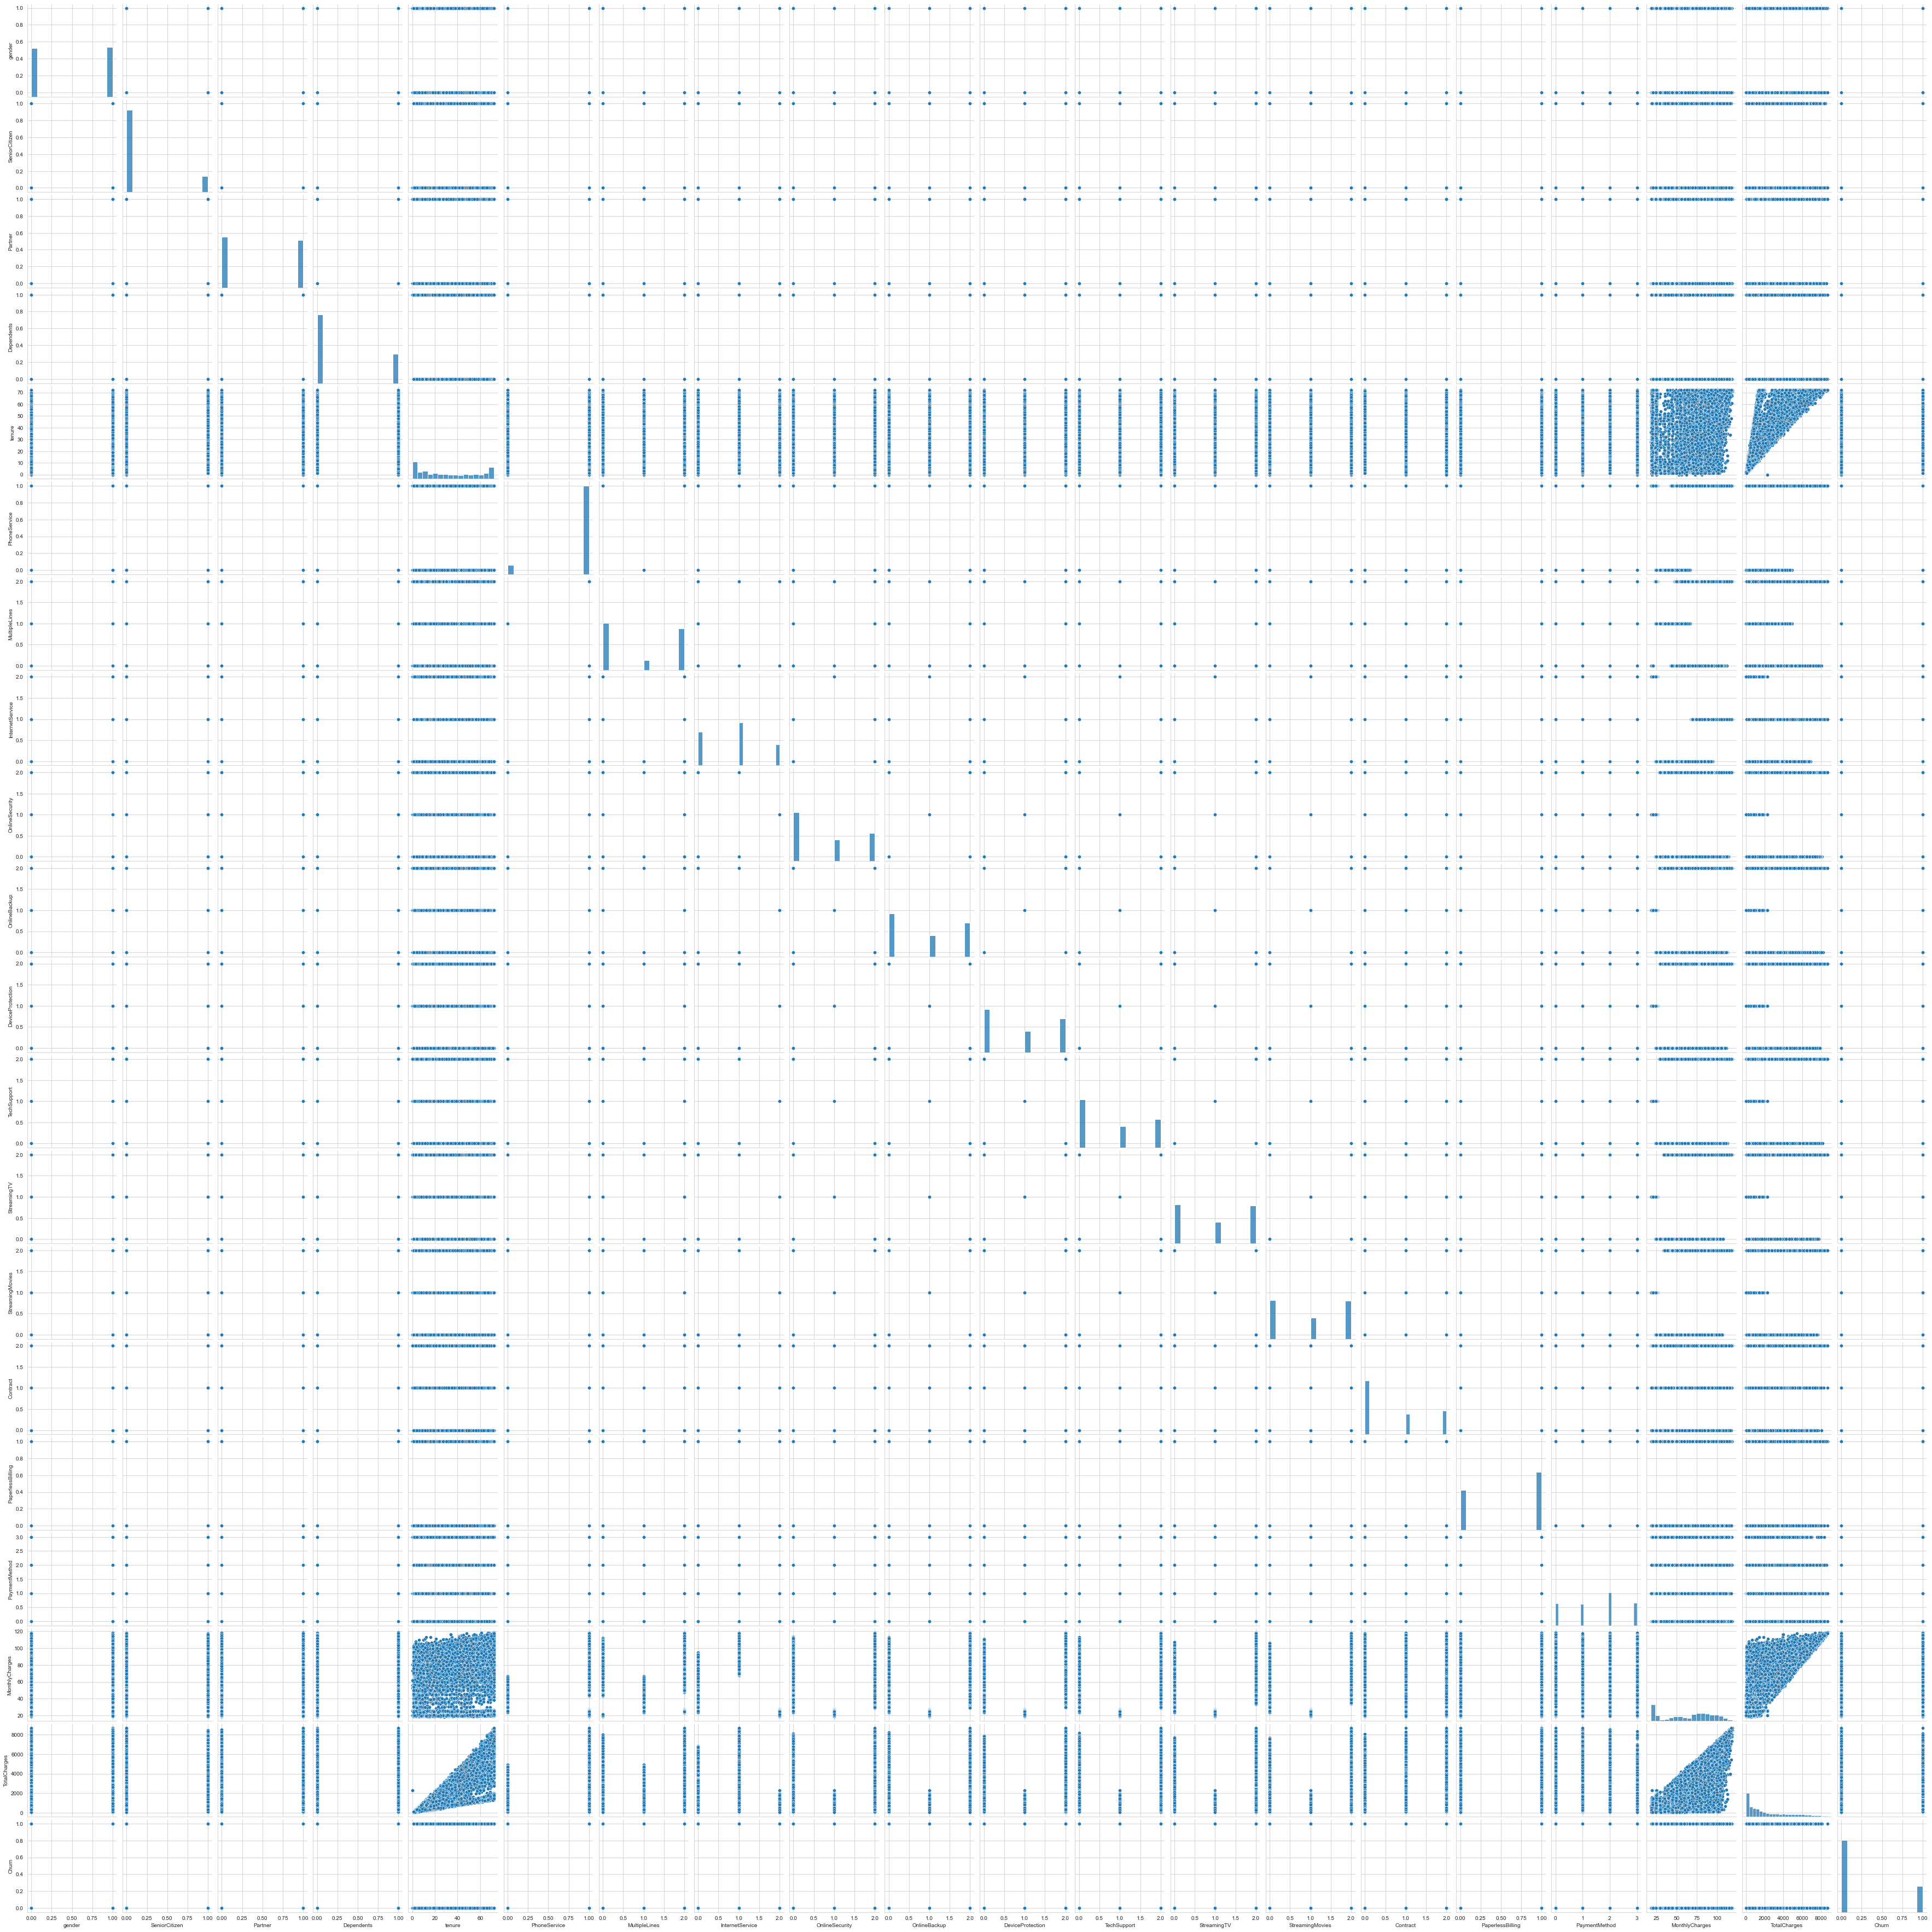

In [92]:
sns.pairplot(data=df)

# Descriptive Statistics

In [93]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


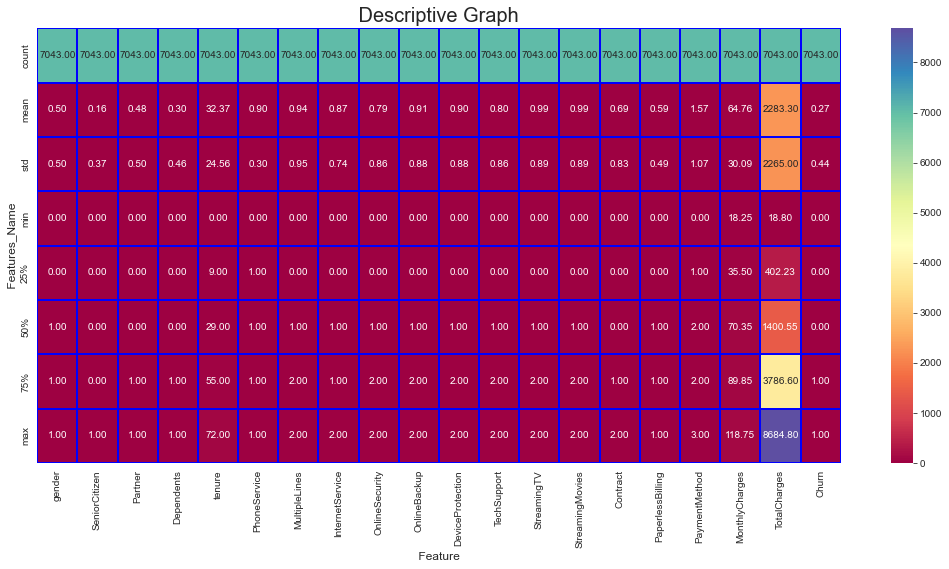

In [94]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.describe(),annot=True,fmt='0.2f',linecolor='blue',linewidth=0.02,cmap='Spectral')
plt.xlabel(" Feature ", fontsize=12)
plt.ylabel(" Features_Name ",fontsize=12)
plt.title(" Descriptive Graph ",fontsize=20)
plt.show()

# Observation:

- Null value:  No null values
- RightSkewness: tenure,TotalCharges
- Left Skewness: MonthlyCharges,
- Standard Deviation: TotalCharges,MonthlyCharges
- Outliers: TotalCharges,MonthlyCharges

# Correlation Graph

In [95]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


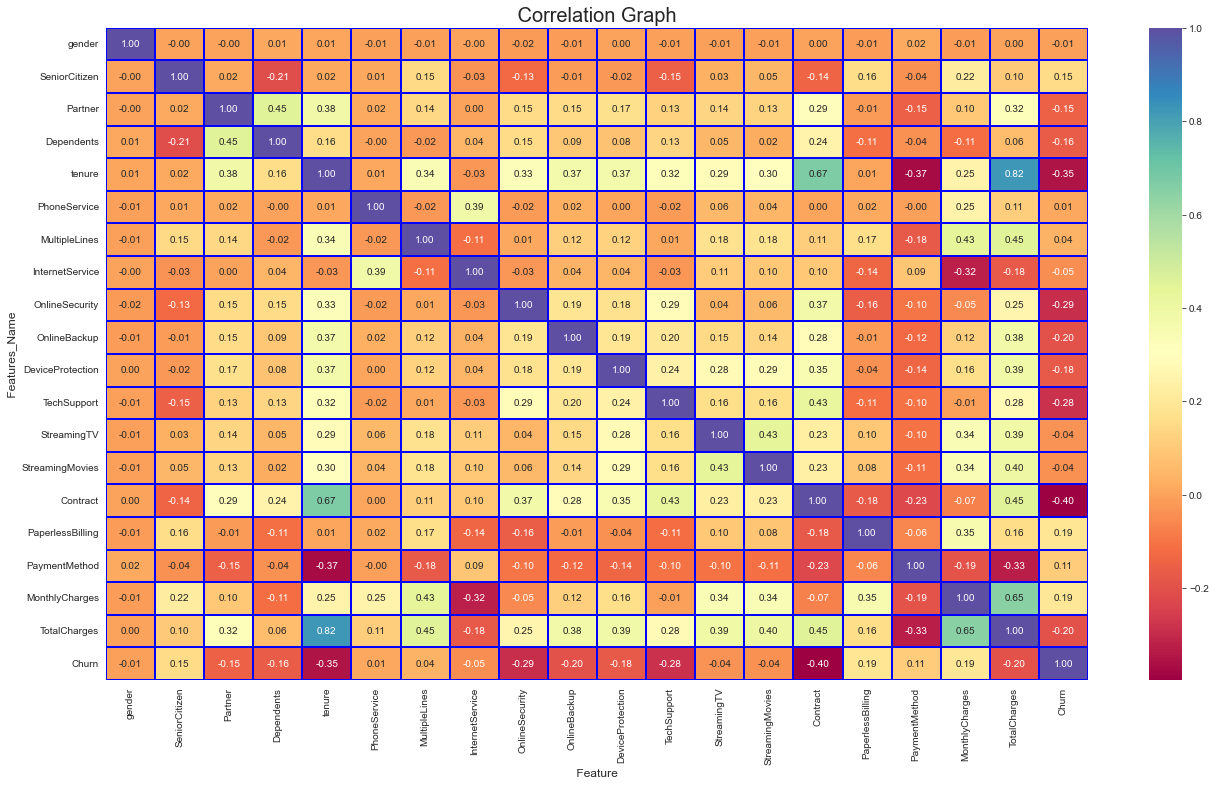

In [96]:
plt.figure(figsize=(22,12))
sns.heatmap(data=df.corr(),annot=True,fmt='0.2f',linecolor='blue',linewidth=0.02,cmap='Spectral')
plt.xlabel(" Feature ", fontsize=12)
plt.ylabel(" Features_Name ",fontsize=12)
plt.title(" Correlation Graph ",fontsize=20)
plt.show()

In [97]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Correlation Graph')

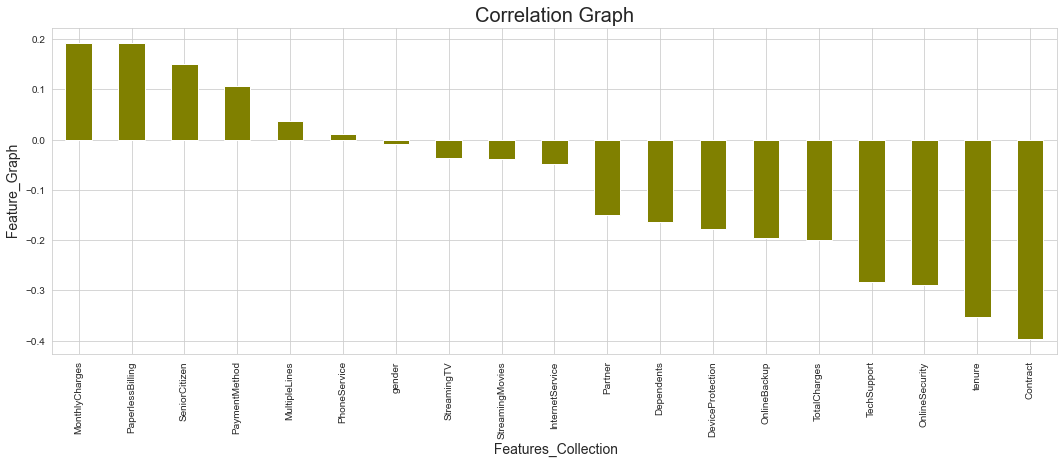

In [98]:
plt.figure(figsize=(18,6))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='olive')
plt.xlabel(" Features_Collection",fontsize=14)
plt.ylabel(" Feature_Graph ",fontsize=14)
plt.title("Correlation Graph",fontsize=20)

# Observation:

- Contract is 39 percentage negatively correlated with the target variable.
- tenure is 35 percentage negatively correlated with the target variable.
- OnlineSecurity is 28 percentage negatively correlated with the target Variable.
- TechSupport is 28 percentage negatively correlated wit target variable.
- TotalCharges is 19 percentage negatively correlated with the target variable.
- OnlineBackup is 19 percentage negatively correlated with the target variable.
- DeviceProtection  is 17 percentage negatively correlated with the target variable.
- Dependents is 16 percentage negatively correlated with the target variable.
- Partner is  15 percentage negatively correlated with the target variable.
- InternetService is 05 percentage negatively correlated with the target variable. 
- StreamingMovies is 04 percentage negatively correlated with target variable.
- StreamingTV is 04 percentage negatively correlated with the target variable.
- gender is 01 percentage negatively correlated with the target variable.
- PhoneService is 01 percentage positively correlated with the target variable.
- MultipleLines is 04 percentage positively correlated with the target variable.
- PaymentMethod is 11 percentage positively correlated with the target variable.
- SeniorCitizen  is 15 percentage positively correlated with the target variable.
- PaperlessBilling is 19 percentage positively correlated with the target variable.
- MonthlyCharges is 19 percentage positively correlated with the target variable.
- Churn is 100 percentafe correlated to own 

### Note:

- Very negatively correlated is contract 39
- MonthlyCharges is 19 percentage positively correlated with the target variable.
- Churn is 100 percentage correlated ((Its a target variable))

# Outliers

<AxesSubplot:xlabel='gender'>

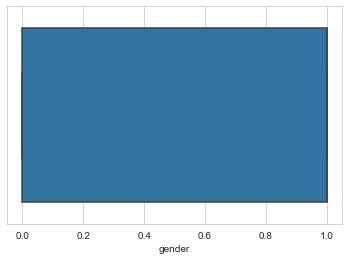

In [99]:
sns.boxplot(x='gender',data=df)

<AxesSubplot:xlabel='SeniorCitizen'>

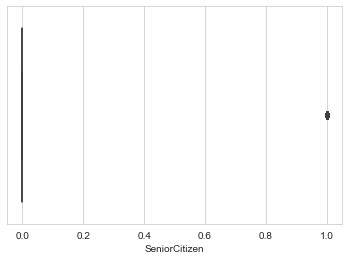

In [100]:
sns.boxplot(x='SeniorCitizen',data=df)

<AxesSubplot:xlabel='Partner'>

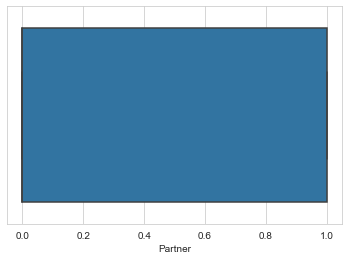

In [101]:
sns.boxplot(x='Partner',data=df)

<AxesSubplot:xlabel='Dependents'>

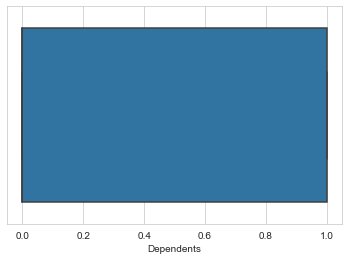

In [102]:
sns.boxplot(x='Dependents',data=df)

<AxesSubplot:xlabel='tenure'>

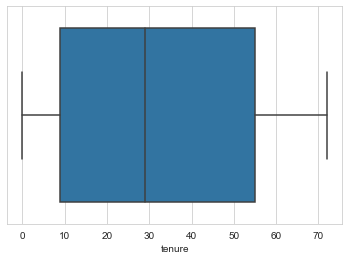

In [103]:
sns.boxplot(x='tenure',data=df)

<AxesSubplot:xlabel='PhoneService'>

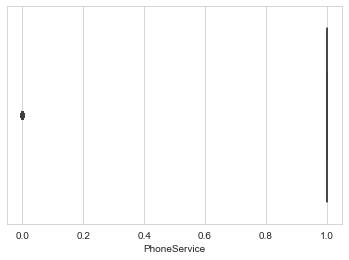

In [104]:
sns.boxplot(x='PhoneService',data=df)

<AxesSubplot:xlabel='MultipleLines'>

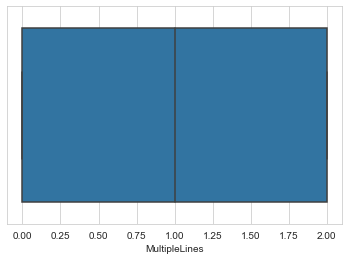

In [105]:
sns.boxplot(x='MultipleLines',data=df)

<AxesSubplot:xlabel='InternetService'>

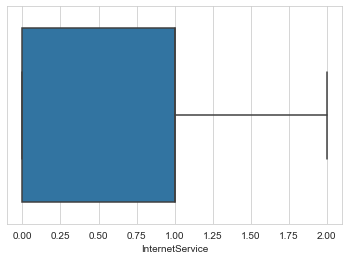

In [106]:
sns.boxplot(x='InternetService',data=df)

<AxesSubplot:xlabel='OnlineSecurity'>

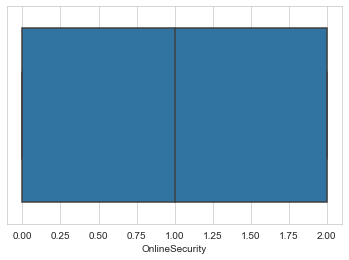

In [107]:
sns.boxplot(x='OnlineSecurity',data=df)

<AxesSubplot:xlabel='OnlineBackup'>

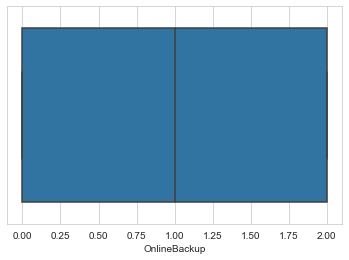

In [108]:
sns.boxplot(x='OnlineBackup',data=df)

<AxesSubplot:xlabel='DeviceProtection'>

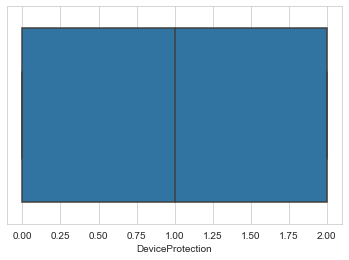

In [109]:
sns.boxplot(x='DeviceProtection',data=df)

<AxesSubplot:xlabel='TechSupport'>

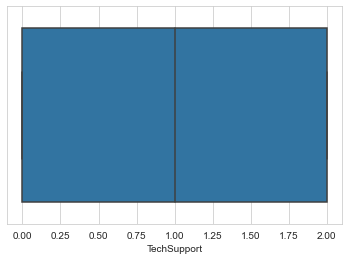

In [110]:
sns.boxplot(x='TechSupport',data=df)

<AxesSubplot:xlabel='StreamingTV'>

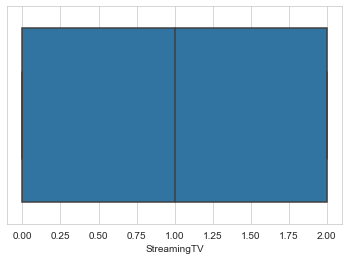

In [111]:
sns.boxplot(x='StreamingTV',data=df)

<AxesSubplot:xlabel='StreamingMovies'>

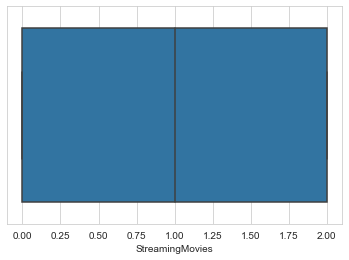

In [112]:
sns.boxplot(x='StreamingMovies',data=df)

<AxesSubplot:xlabel='Contract'>

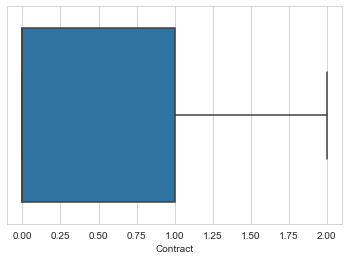

In [113]:
sns.boxplot(x='Contract',data=df)

<AxesSubplot:xlabel='PaperlessBilling'>

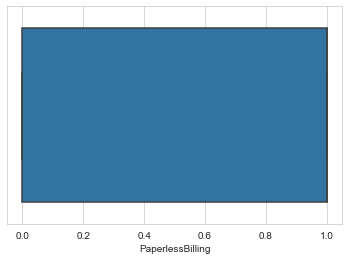

In [114]:
sns.boxplot(x='PaperlessBilling',data=df)

<AxesSubplot:xlabel='PaymentMethod'>

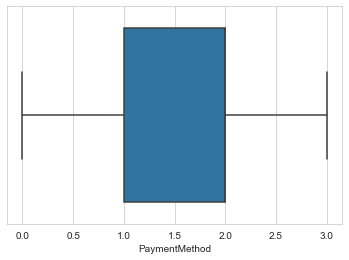

In [115]:
sns.boxplot(x='PaymentMethod',data=df)

<AxesSubplot:xlabel='MonthlyCharges'>

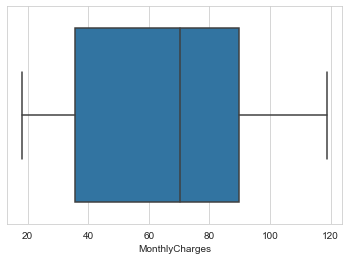

In [116]:
sns.boxplot(x='MonthlyCharges',data=df)

<AxesSubplot:xlabel='TotalCharges'>

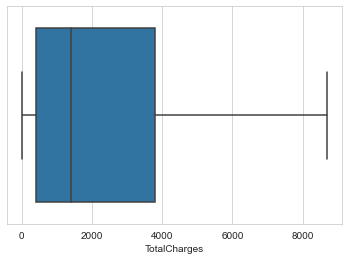

In [117]:
sns.boxplot(x='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn'>

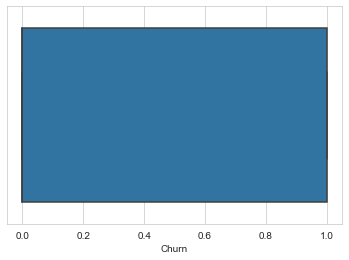

In [118]:
sns.boxplot(x='Churn',data=df)

### Observation:

- SeniorCitizen, PhoneService category variable showing outliers

we don't remove outliers from Category var or target var.

# Skewness

In [119]:
df.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

# Observation

Skewness Threshold is taken is(+/-65).

`Outcome shows, Column showing skewness are..

1. PhoneService      ----> -2.727153
2. Dependents        ---->  0.875199
3. TotalCharges      ---->  0.962394
4. Churn             ---->  1.063031
5. SeniorCitizen     ---->  1.833633

<AxesSubplot:xlabel='PhoneService', ylabel='Count'>

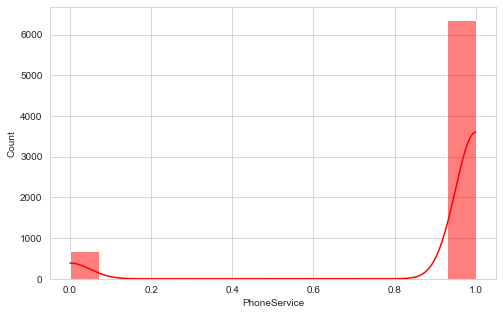

In [120]:
plt.figure(figsize=(8,5))
sns.histplot(df['PhoneService'],color='r',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

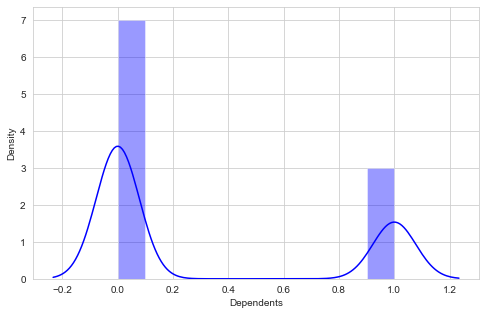

In [121]:
plt.figure(figsize=(8,5))
sns.distplot(df['Dependents'],color='blue',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

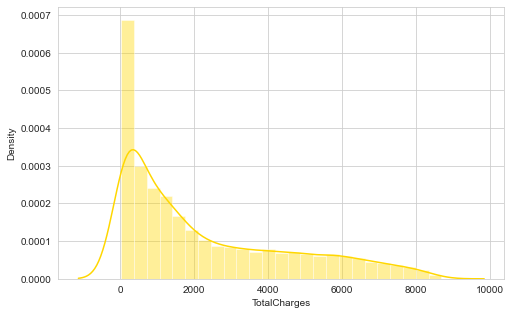

In [122]:
plt.figure(figsize=(8,5))
sns.distplot(df['TotalCharges'],color='gold',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

<AxesSubplot:xlabel='Churn', ylabel='Density'>

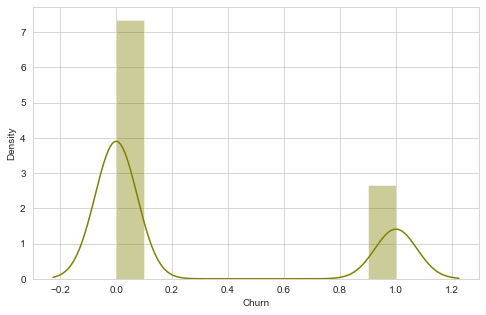

In [123]:
plt.figure(figsize=(8,5))
sns.distplot(df['Churn'],color='olive',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

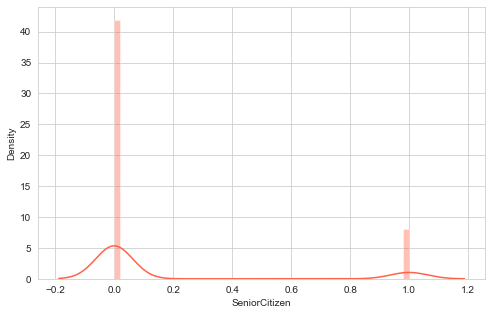

In [124]:
plt.figure(figsize=(8,5))
sns.distplot(df['SeniorCitizen'],color='Tomato',kde=True)

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

# Cleaning Data :

## 1. Correlation 

In [125]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

In [126]:
delete=pd.DataFrame(data={"Column":['Contract','gender','PhoneService'],"Values":[-0.396713,-0.008612,0.011942],
                         "Outliers":['NO','NO','NO'],
                         "Normalised":['No','No','Yes']})
delete

,Column,Values,Outliers,Normalised
0,Contract,-0.396713,NO,No
1,gender,-0.008612,NO,No
2,PhoneService,0.011942,NO,Yes


In [127]:
# Deleting these columns as relation is near to zero.
df.drop(['Contract','gender','PhoneService'],axis=1,inplace=True)

In [128]:
df.corr()['Churn'].sort_values()

tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

# 2. Removing Outliers Zscore

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [130]:
z.head(3)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.439916,1.034530,0.654012,1.277445,0.062723,1.183234,0.918838,1.242550,1.027910,0.925262,1.113495,1.121405,0.829798,0.398558,1.160323,0.994971,0.601023
1,0.439916,0.966622,0.654012,0.066327,0.991588,1.183234,1.407321,1.029919,1.245111,0.925262,1.113495,1.121405,1.205113,1.334863,0.259629,0.173876,0.601023
2,0.439916,0.966622,0.654012,1.236724,0.991588,1.183234,1.407321,1.242550,1.027910,0.925262,1.113495,1.121405,0.829798,1.334863,0.362660,0.960399,1.663829


In [131]:
# Here threshold is 3, checking values where z>3

np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [132]:
# No removal as no order shows outliers. we will continue with old df

In [133]:
# copying df to to new df as back up purpose

new_df=pd.DataFrame(data=df)

In [134]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [135]:
x.head(5)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,29.85
1,0,0,0,34,0,0,2,0,2,0,0,0,0,3,56.95,1889.50
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,108.15
3,0,0,0,45,1,0,2,0,2,2,0,0,0,0,42.30,1840.75
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,151.65


In [136]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [137]:
print("Shape of X ",x.shape," Shape of Y ",y.shape)

Shape of X  (7043, 16)  Shape of Y  (7043,)


# 3. Removing Skewness

In [138]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

x=pt.fit_transform(x)

In [139]:
x

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.40968472,
        -1.1585412 , -1.81058786],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.23949171,  0.25331304],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.34266505, -1.38726921],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.40968472,
        -1.16724064, -0.85989943],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  1.31889872,
         0.33431207, -0.92296815],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.48983732,
         1.33886338,  1.48444325]])

In [140]:
x=pd.DataFrame(data=x,columns=['SeniorCitizen','Partner','Dependents','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])

In [141]:
x.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144899
dtype: float64

In [142]:
x.drop(['SeniorCitizen'],axis=1,inplace=True)

In [143]:
x.skew()

Partner             0.067922
Dependents          0.875199
tenure             -0.243325
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144899
dtype: float64

# Using Standard Scaler

In [144]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x=ss.fit_transform(x)

In [145]:
x

array([[ 1.03453023, -0.65401193, -1.6443435 , ...,  0.40968472,
        -1.1585412 , -1.81058786],
       [-0.96662231, -0.65401193,  0.29720527, ...,  1.31889872,
        -0.23949171,  0.25331304],
       [-0.96662231, -0.65401193, -1.49544443, ...,  1.31889872,
        -0.34266505, -1.38726921],
       ...,
       [ 1.03453023,  1.5290241 , -0.72512119, ...,  0.40968472,
        -1.16724064, -0.85989943],
       [ 1.03453023, -0.65401193, -1.26512968, ...,  1.31889872,
         0.33431207, -0.92296815],
       [-0.96662231, -0.65401193,  1.20189603, ..., -1.48983732,
         1.33886338,  1.48444325]])

In [146]:
print(" Mean ",round(x.mean(),2)," Standard Deviation ",round(x.std(),2))

 Mean  0.0  Standard Deviation  1.0


# Principle Component Analysis

from sklearn.decomposition import PCA
pca=PCA(n_components=7)

x=pca.fit_transform(x)

##### Not working good to accuracy Score

# Checking Target variable

<AxesSubplot:xlabel='Churn', ylabel='count'>

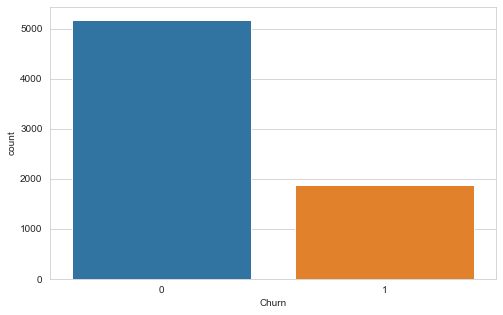

In [147]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)

In [148]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [149]:
x,y=smt.fit_resample(x,y)

0    5174
1    5174
Name: Churn, dtype: int64

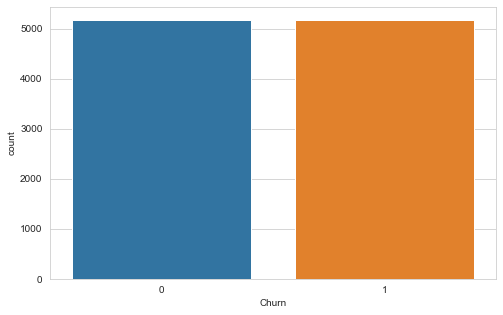

In [150]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)
y.value_counts()

#  IMPORTING Model:

In [151]:
# linear_model,train test and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Clssifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# cross Validation
from sklearn.model_selection import cross_val_score

# Ensamble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# neural network
from sklearn.neural_network import MLPClassifier

# hyper paramter
from sklearn.model_selection import GridSearchCV

In [152]:
# Instances :
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
gnb=GaussianNB()
svc=SVC()
sgd=SGDClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
mlp=MLPClassifier()

# Model Selection

In [153]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    #train and score
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    
    #predict train and test
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    
    # loop
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The random state:-",i)
        print("Training accuracy_score is ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is ",accuracy_score(y_test,pred_test)*100,"\n")

The random state:- 21
Training accuracy_score is  76.8301522106789
Testing accuracy_score is  76.81159420289855 

The random state:- 32
Training accuracy_score is  76.85431263590239
Testing accuracy_score is  76.90821256038647 

The random state:- 88
Training accuracy_score is  76.54022710799711
Testing accuracy_score is  76.52173913043478 

The random state:- 93
Training accuracy_score is  76.72143029717323
Testing accuracy_score is  76.66666666666667 

The random state:- 126
Training accuracy_score is  76.73351050978498
Testing accuracy_score is  76.66666666666667 

The random state:- 136
Training accuracy_score is  76.62478859627929
Testing accuracy_score is  76.61835748792271 

The random state:- 142
Training accuracy_score is  76.8301522106789
Testing accuracy_score is  76.7632850241546 

The random state:- 171
Training accuracy_score is  76.73351050978498
Testing accuracy_score is  76.66666666666667 

The random state:- 219
Training accuracy_score is  76.7697511476202
Testing acc

#### Slected Random State is 49 as training score is close to testing Score

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=0.20)

#sent for training
lg.fit(x_train,y_train)

#predict(x_training data)
pred_train=lg.predict(x_train) 
pred_test=lg.predict(x_test) 

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),'\n',"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"\n")
print("Classification Report \n",classification_report(y_test,pred_test),'\n\n')

Accuracy Training Score = 0.768301522106789  Accuracy Test Score = 0.7681159420289855 

Training Confusion_Matrix 
 [[3163  948]
 [ 970 3197]] 
 Testing Confusion_Matrix 
 [[803 260]
 [220 787]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      1063
           1       0.75      0.78      0.77      1007

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070
 




## Model Cross Validation:

In [156]:
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

for i in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7656551990722845 Training Score  0.768301522106789 Testing Score  0.7681159420289855
A cross-fold  3 CV_mean  0.7671058894057369 Training Score  0.768301522106789 Testing Score  0.7681159420289855
A cross-fold  4 CV_mean  0.7642056436026285 Training Score  0.768301522106789 Testing Score  0.7681159420289855
A cross-fold  5 CV_mean  0.7644972132912116 Training Score  0.768301522106789 Testing Score  0.7681159420289855
A cross-fold  6 CV_mean  0.7651747985249449 Training Score  0.768301522106789 Testing Score  0.7681159420289855
A cross-fold  7 CV_mean  0.7654636396110402 Training Score  0.768301522106789 Testing Score  0.7681159420289855
A cross-fold  8 CV_mean  0.7656580403815096 Training Score  0.768301522106789 Testing Score  0.7681159420289855
A cross-fold  9 CV_mean  0.7659472004641718 Training Score  0.768301522106789 Testing Score  0.7681159420289855


### Selected Cross Val 9 as CV_Score is close to Testing Score

In [157]:
# accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#score and mean
cv_score =cross_val_score(lg,x,y,cv=9)
cv_mean  =cv_score.mean()

# result
print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  9 CV_mean  0.7659472004641718 Training Score  0.768301522106789 Testing Score  0.7681159420289855


### AUC_ROC_Graph

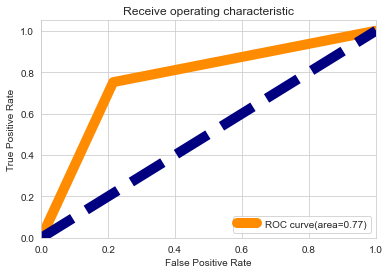

In [158]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 1. Decision Tree

In [160]:
#train and score
dtc.fit(x_train,y_train)
dtc_score=dtc.score(x_train,y_train)

#predict
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.9979463638560039  Accuracy Test Score = 0.7772946859903381 

Training Confusion_Matrix 
 [[4108    3]
 [  14 4153]] Testing Confusion_Matrix 
 [[826 237]
 [224 783]]
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1063
           1       0.77      0.78      0.77      1007

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



### Model Cross Validation

In [161]:
#train test Accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#Range finding cv Score
for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7543486664089679 Training Score  0.9979463638560039 Testing Score  0.7772946859903381
A cross-fold  3 CV_mean  0.759765079285041 Training Score  0.9979463638560039 Testing Score  0.7772946859903381
A cross-fold  4 CV_mean  0.7701971395438733 Training Score  0.9979463638560039 Testing Score  0.7772946859903381
A cross-fold  5 CV_mean  0.768077322704847 Training Score  0.9979463638560039 Testing Score  0.7772946859903381
A cross-fold  6 CV_mean  0.7665318829371084 Training Score  0.9979463638560039 Testing Score  0.7772946859903381
A cross-fold  7 CV_mean  0.7688583529160812 Training Score  0.9979463638560039 Testing Score  0.7772946859903381
A cross-fold  8 CV_mean  0.7680859574381612 Training Score  0.9979463638560039 Testing Score  0.7772946859903381
A cross-fold  9 CV_mean  0.7690473127230989 Training Score  0.9979463638560039 Testing Score  0.7772946859903381


#### Model Cross Validation selected is 9 as test and cv score is closeby

In [162]:
# accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#score and mean
cv_score =cross_val_score(dtc,x,y,cv=9)
cv_mean  =cv_score.mean()

# result
print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  9 CV_mean  0.7704963358181658 Training Score  0.9979463638560039 Testing Score  0.7772946859903381


### AOC_ROC_Graph

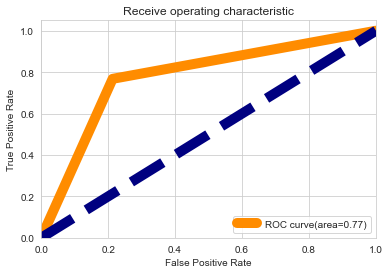

In [163]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_curve=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 2: KNeighbors Classifier

In [164]:
# train and score
knc.fit(x_train,y_train)
knc_score=knc.score(x_train,y_train)

#predict
pred_train= knc.predict(x_train)
pred_test = knc.predict(x_test)

#result
print("Training Score",knc_score)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"\n","Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Training Score 0.8569702826769752
Accuracy Training Score = 0.8569702826769752  Accuracy Test Score = 0.77487922705314 

Training Confusion_Matrix 
 [[3236  875]
 [ 309 3858]] 
 Testing Confusion_Matrix 
 [[745 318]
 [148 859]]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.70      0.76      1063
           1       0.73      0.85      0.79      1007

    accuracy                           0.77      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.77      0.77      2070



### Model Cross Validation

In [165]:
#accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#range for cv 
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7797642056436027 Training Score  0.8569702826769752 Testing Score  0.77487922705314
A cross-fold  3 CV_mean  0.7884635047895981 Training Score  0.8569702826769752 Testing Score  0.77487922705314
A cross-fold  4 CV_mean  0.7917471975260919 Training Score  0.8569702826769752 Testing Score  0.77487922705314
A cross-fold  5 CV_mean  0.7908806093167369 Training Score  0.8569702826769752 Testing Score  0.77487922705314
A cross-fold  6 CV_mean  0.7929097593507964 Training Score  0.8569702826769752 Testing Score  0.77487922705314
A cross-fold  7 CV_mean  0.7927197662696267 Training Score  0.8569702826769752 Testing Score  0.77487922705314
A cross-fold  8 CV_mean  0.7949411944712403 Training Score  0.8569702826769752 Testing Score  0.77487922705314
A cross-fold  9 CV_mean  0.7933914388903605 Training Score  0.8569702826769752 Testing Score  0.77487922705314


#### Model Cross Validation selected is 8 as test and cv score is closeby

In [166]:
#accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#cross val score(K_neighbors)
knc_cv_score=cross_val_score(knc,x,y,cv=8) # cv_score is near to training score
knc_mean=knc_cv_score.mean()

#predict result
print(" Cross Validation_mean ",knc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 Cross Validation_mean  0.7949411944712403 Training Score  0.8569702826769752 Testing Score  0.77487922705314


### AUC_ROC_Graph

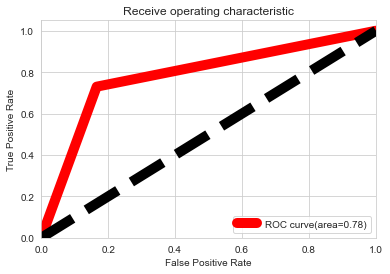

In [167]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 3: SVC (Support Vector Machine)

In [168]:
#train and score
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)

# predict
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.8194008214544576  Accuracy Test Score = 0.7951690821256039 

Training Confusion_Matrix 
 [[3171  940]
 [ 555 3612]] Testing Confusion_Matrix 
 [[793 270]
 [154 853]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1063
           1       0.76      0.85      0.80      1007

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.79      2070
weighted avg       0.80      0.80      0.79      2070



### Model Cross Validation

In [169]:
#score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,10):
    cv_svc_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_svc_score.mean() 
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.782276768457673 Training Score  0.8194008214544576 Testing Score  0.7951690821256039
A cross-fold  3 CV_mean  0.7860476256507872 Training Score  0.8194008214544576 Testing Score  0.7951690821256039
A cross-fold  4 CV_mean  0.7918438345574024 Training Score  0.8194008214544576 Testing Score  0.7951690821256039
A cross-fold  5 CV_mean  0.7938761986817128 Training Score  0.8194008214544576 Testing Score  0.7951690821256039
A cross-fold  6 CV_mean  0.7919449208110562 Training Score  0.8194008214544576 Testing Score  0.7951690821256039
A cross-fold  7 CV_mean  0.7953277713493125 Training Score  0.8194008214544576 Testing Score  0.7951690821256039
A cross-fold  8 CV_mean  0.7965850328304471 Training Score  0.8194008214544576 Testing Score  0.7951690821256039
A cross-fold  9 CV_mean  0.795037398620098 Training Score  0.8194008214544576 Testing Score  0.7951690821256039


#### Selected Cross Fold 8, As Model Testing Score and Cross Validation Score is nearby.

In [170]:
#accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#cross val score
svc_cv_score=cross_val_score(svc,x,y,cv=8)
svc_mean=svc_cv_score.mean()

print(" CV_mean ",svc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 CV_mean  0.7965850328304471 Training Score  0.8194008214544576 Testing Score  0.7951690821256039


#### Model AUC ROC Graph

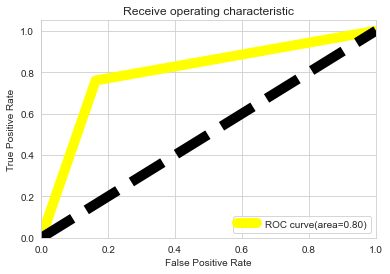

In [171]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 4. Naive_bayes

In [172]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

#train and score
gnb.fit(x_train,y_train)
gnb_score=gnb.score(x_train,y_train)

# predict
pred_train=gnb.predict(x_train)
pred_test=gnb.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.7464363372795361  Accuracy Test Score = 0.7468599033816425 

Training Confusion_Matrix 
 [[3116  995]
 [1104 3063]] Testing Confusion_Matrix 
 [[794 269]
 [255 752]]
Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1063
           1       0.74      0.75      0.74      1007

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



# Model Cross Validation

In [173]:
#score
gnb_train=accuracy_score(y_train,pred_train)
gnb_test=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,10):
    cv_gnb_score=cross_val_score(gnb,x,y,cv=i)
    cv_mean=cv_gnb_score.mean()    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",gnb_train,"Testing Score ",gnb_test)

A cross-fold  2 CV_mean  0.7456513335910321 Training Score  0.7464363372795361 Testing Score  0.7468599033816425
A cross-fold  3 CV_mean  0.7457483300487574 Training Score  0.7464363372795361 Testing Score  0.7468599033816425
A cross-fold  4 CV_mean  0.7451681484344801 Training Score  0.7464363372795361 Testing Score  0.7468599033816425
A cross-fold  5 CV_mean  0.7450725805133522 Training Score  0.7464363372795361 Testing Score  0.7468599033816425
A cross-fold  6 CV_mean  0.7447833372563525 Training Score  0.7464363372795361 Testing Score  0.7468599033816425
A cross-fold  7 CV_mean  0.7453614080600277 Training Score  0.7464363372795361 Testing Score  0.7468599033816425
A cross-fold  8 CV_mean  0.7447831684340003 Training Score  0.7464363372795361 Testing Score  0.7468599033816425
A cross-fold  9 CV_mean  0.7453625290632897 Training Score  0.7464363372795361 Testing Score  0.7468599033816425


#### Selected Cross Fold 9, As Model Testing Score and Cross Validation Score is nearby.

In [174]:
#score
gnb_train=accuracy_score(y_train,pred_train)
gnb_test=accuracy_score(y_test,pred_test)

#cross val score
cv_gnb_score=cross_val_score(gnb,x,y,cv=9)
gnb_mean=cv_gnb_score.mean()

print(" CV_mean ",gnb_mean,"Training Score ",gnb_train,"Testing Score ",gnb_test)

 CV_mean  0.7453625290632897 Training Score  0.7464363372795361 Testing Score  0.7468599033816425


### Model AUC_ROC_Graph

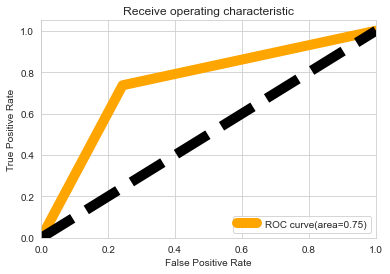

In [175]:
## AOC ROC score curve 
from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Ensamble Technique

---------------------------------

## Model1 Extra Trees Classifier

In [176]:
# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9979463638560039  Accuracy Test Score = 0.8463768115942029 

Training Confusion_Matrix 
 [[4108    3]
 [  14 4153]] Testing Confusion_Matrix 
 [[891 172]
 [146 861]]
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1063
           1       0.83      0.86      0.84      1007

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### Model Cross Validation

In [177]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.8322381136451489 Training Score  0.9979463638560039 Testing Score  0.8463768115942029
A cross-fold  3 CV_Score  0.8505071973532901 Training Score  0.9979463638560039 Testing Score  0.8463768115942029
A cross-fold  4 CV_Score  0.8507924236567452 Training Score  0.9979463638560039 Testing Score  0.8463768115942029
A cross-fold  5 CV_Score  0.8525381581804554 Training Score  0.9979463638560039 Testing Score  0.8463768115942029
A cross-fold  6 CV_Score  0.8542784446910344 Training Score  0.9979463638560039 Testing Score  0.8463768115942029
A cross-fold  7 CV_Score  0.8569885609042739 Training Score  0.9979463638560039 Testing Score  0.8463768115942029
A cross-fold  8 CV_Score  0.8569912177209107 Training Score  0.9979463638560039 Testing Score  0.8463768115942029
A cross-fold  9 CV_Score  0.854954991317802 Training Score  0.9979463638560039 Testing Score  0.8463768115942029


### Selected Cross-Fold 8 as cv_score is close to Testing Score

In [178]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=8)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8566043706989603 Testing Accuracy Score  0.8463768115942029


### Model AUC_ROC_Graph

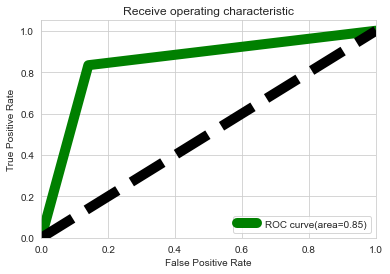

In [179]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='green',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model2: Random Forest Classifier

In [180]:
#random Forest Training and score
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict random Forest
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
      
#result random Forest
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9978255617298865  Accuracy Test Score = 0.8304347826086956 

Training Confusion_Matrix 
 [[4102    9]
 [   9 4158]] Testing Confusion_Matrix 
 [[875 188]
 [163 844]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1063
           1       0.82      0.84      0.83      1007

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



## Model Cross Validation

In [181]:
#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for model
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8227676845767298 Training Score  0.9978255617298865 Testing Score  0.8304347826086956
A cross-fold  3 CV_mean  0.8329200230270484 Training Score  0.9978255617298865 Testing Score  0.8304347826086956
A cross-fold  4 CV_mean  0.8397758020873598 Training Score  0.9978255617298865 Testing Score  0.8304347826086956
A cross-fold  5 CV_mean  0.8374646203561664 Training Score  0.9978255617298865 Testing Score  0.8304347826086956
A cross-fold  6 CV_mean  0.842200029142428 Training Score  0.9978255617298865 Testing Score  0.8304347826086956
A cross-fold  7 CV_mean  0.8430751704349325 Training Score  0.9978255617298865 Testing Score  0.8304347826086956
A cross-fold  8 CV_mean  0.8434646461567519 Training Score  0.9978255617298865 Testing Score  0.8304347826086956
A cross-fold  9 CV_mean  0.8437466732256151 Training Score  0.9978255617298865 Testing Score  0.8304347826086956


## Selected cross fold 8 as cv_score is close to Testing Score

In [182]:
#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

# model cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=8) 
rfc_mean=rfc_cv_score.mean()# mean value

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8438510449202757 Testing Accuracy Score  0.8304347826086956


### AOC_ROC_Graph

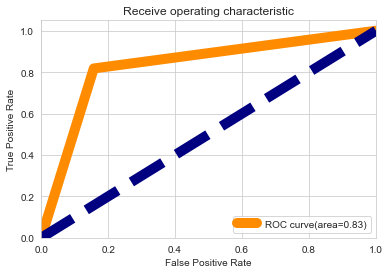

In [183]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Boosting Technique 

## Model3: ADA BOOST Classifier

In [184]:
ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8069582024643633  Accuracy Test Score = 0.8 

Training Confusion_Matrix 
 [[3257  854]
 [ 744 3423]] Testing Confusion_Matrix 
 [[833 230]
 [184 823]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1063
           1       0.78      0.82      0.80      1007

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



### Model Cross Validation

In [185]:
#train and score for Ada Boost
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for Ada Boost
for i in range(2,10):
    cv_ada_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_ada_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7820834943950521 Training Score  0.8069582024643633 Testing Score  0.8
A cross-fold  3 CV_mean  0.7963904961600576 Training Score  0.8069582024643633 Testing Score  0.8
A cross-fold  4 CV_mean  0.800251256281407 Training Score  0.8069582024643633 Testing Score  0.8
A cross-fold  5 CV_mean  0.8009344288706298 Training Score  0.8069582024643633 Testing Score  0.8
A cross-fold  6 CV_mean  0.7973595278926662 Training Score  0.8069582024643633 Testing Score  0.8
A cross-fold  7 CV_mean  0.7991977902635087 Training Score  0.8069582024643633 Testing Score  0.8
A cross-fold  8 CV_mean  0.7992960250833461 Training Score  0.8069582024643633 Testing Score  0.8
A cross-fold  9 CV_mean  0.8001605260613094 Training Score  0.8069582024643633 Testing Score  0.8


### Model Slected  Cross Fold is 8 as Cv_Score is close to Testing Score

In [186]:
#Model_predict test
ada_test=ada.predict(x_test)

#cross val score
ada_cv_score=cross_val_score(ada,x,y,cv=8) 
ada_mean=ada_cv_score.mean()

print(" CV_mean ",ada_mean,"Testing Accuracy Score ",accuracy_score(y_test,ada_test))

 CV_mean  0.7992960250833461 Testing Accuracy Score  0.8


### Model AUC_ROC_graph

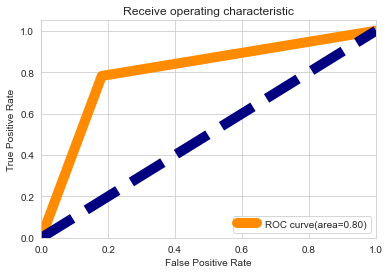

In [187]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model4: Gradient Boosting

In [188]:
#train and score gradient Boosting Classifier
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_train,y_train)

#predict Gradient Boosting Classifier
pred_train=gbc.predict(x_train)
pred_test=gbc.predict(x_test)

#result gradient Boosting classifier
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8424740275428848  Accuracy Test Score = 0.8091787439613527 

Training Confusion_Matrix 
 [[3372  739]
 [ 565 3602]] Testing Confusion_Matrix 
 [[832 231]
 [164 843]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1063
           1       0.78      0.84      0.81      1007

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



#### Model Cross Validation

In [189]:
#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_gbc_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_gbc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7989949748743719 Training Score  0.8424740275428848 Testing Score  0.8091787439613527
A cross-fold  3 CV_mean  0.8111786235035571 Training Score  0.8424740275428848 Testing Score  0.8091787439613527
A cross-fold  4 CV_mean  0.8196752995747971 Training Score  0.8424740275428848 Testing Score  0.8091787439613527
A cross-fold  5 CV_mean  0.8199740825575613 Training Score  0.8424740275428848 Testing Score  0.8091787439613527
A cross-fold  6 CV_mean  0.8223896230539022 Training Score  0.8424740275428848 Testing Score  0.8091787439613527
A cross-fold  7 CV_mean  0.8232642130623888 Training Score  0.8424740275428848 Testing Score  0.8091787439613527
A cross-fold  8 CV_mean  0.8215265052219118 Training Score  0.8424740275428848 Testing Score  0.8091787439613527
A cross-fold  9 CV_mean  0.8217133150860021 Training Score  0.8424740275428848 Testing Score  0.8091787439613527


### Selected cross fold 7 as cross val score  is close to testing Score 

In [190]:
#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
gbc_cv_score=cross_val_score(gbc,x,y,cv=7)
gbc_mean=gbc_cv_score.mean()

print(" CV_mean ",gbc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8232642130623888 Testing Accuracy Score  0.8091787439613527


### Model auc_roc_graph

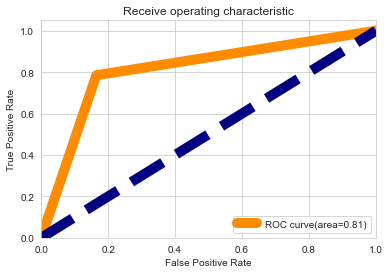

In [191]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model 5: MLP Classifier

In [192]:
#train
mlp.fit(x_train,y_train)
mlp_score=mlp.score(x_train,y_train)

#predict
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8493597487315777  Accuracy Test Score = 0.8 

Training Confusion_Matrix 
 [[3342  769]
 [ 478 3689]] Testing Confusion_Matrix 
 [[807 256]
 [158 849]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1063
           1       0.77      0.84      0.80      1007

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



### Model Cross Validation 

In [193]:
# accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_mlAp_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=cv_mlp_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7923270197139544 Training Score  0.8493597487315777 Testing Score  0.8
A cross-fold  3 CV_mean  0.7989969787504044 Training Score  0.8493597487315777 Testing Score  0.8
A cross-fold  4 CV_mean  0.803150367220719 Training Score  0.8493597487315777 Testing Score  0.8
A cross-fold  5 CV_mean  0.8044112887973606 Training Score  0.8493597487315777 Testing Score  0.8
A cross-fold  6 CV_mean  0.7983234136991829 Training Score  0.8493597487315777 Testing Score  0.8
A cross-fold  7 CV_mean  0.807312883624823 Training Score  0.8493597487315777 Testing Score  0.8
A cross-fold  8 CV_mean  0.8041244407229033 Training Score  0.8493597487315777 Testing Score  0.8
A cross-fold  9 CV_mean  0.8026714261088197 Training Score  0.8493597487315777 Testing Score  0.8


### Slected cross fold 8 as cross val score is close to Training Score

In [194]:
# accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
mlp_cv_score=cross_val_score(mlp,x,y,cv=8)
cv_mean=mlp_cv_score.mean()

print(" CV_mean ",cv_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.806347354259232 Testing Accuracy Score  0.8


### Model Auc_roc_graph

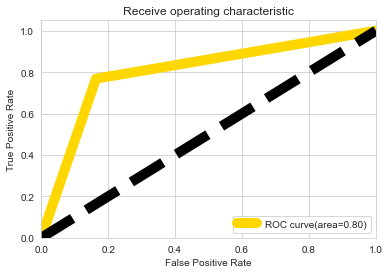

In [195]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='gold',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model with Hyper-Paramter

-------------------

#### Almost all the models are working in near 80s. I Selected: Extra Tress  and Random Forest Classifier due to following result:

- Model CV_Score is far better.
- Model Testing score and Training accuracy is far better then other Models.
- Model Cv_score is close to testing score

# Grid Search: Random Forest Classifier

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc= RandomForestClassifier()

#Parameter  
parameters={'n_estimators':[100],
            'criterion':['gini', 'entropy', 'log_loss'],
            'n_jobs':[2,4],
           'max_features':['sqrt', 'log2','None'],
           'class_weight':['balanced','balanced_subsample'],
           'random_state':[21]}

gsv=GridSearchCV(rfc,parameters,cv=8,verbose=1)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Fitting 8 folds for each of 36 candidates, totalling 288 fits
Best Parameter  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': 2, 'random_state': 21} Best Score  0.8365551911342846


In [278]:
etc= ExtraTreesClassifier(class_weight= 'balanced_subsample', criterion='entropy', max_features= 'sqrt', n_estimators= 100, n_jobs= 3,
                          min_samples_leaf=2,min_weight_fraction_leaf=0.001,ccp_alpha=0.000001,max_samples=1.0,max_leaf_nodes=16)

#random Forest Training and score
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict random Forest
pred_train2=rfc.predict(x_train)
pred_test2=rfc.predict(x_test)
      
#result random Forest
print("Accuracy Training Score =",accuracy_score(y_train,pred_train2)," Accuracy Test Score =",accuracy_score(y_test,pred_test2),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train2),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test2))
print("Classification Report \n",classification_report(y_test,pred_test2))

Accuracy Training Score = 0.9978255617298865  Accuracy Test Score = 0.8318840579710145 

Training Confusion_Matrix 
 [[4101   10]
 [   8 4159]] Testing Confusion_Matrix 
 [[878 185]
 [163 844]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1063
           1       0.82      0.84      0.83      1007

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



### Model Cross Validation Score

In [279]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train2)
test_accuracy=accuracy_score(y_test,pred_test2)

#cross val
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.823540780827213 Training Score  0.9978255617298865 Testing Score  0.8318840579710145
A cross-fold  3 CV_Score  0.836302337861706 Training Score  0.9978255617298865 Testing Score  0.8318840579710145
A cross-fold  4 CV_Score  0.8417085427135679 Training Score  0.9978255617298865 Testing Score  0.8318840579710145
A cross-fold  5 CV_Score  0.8405570148710082 Training Score  0.9978255617298865 Testing Score  0.8318840579710145
A cross-fold  6 CV_Score  0.8408469237925508 Training Score  0.9978255617298865 Testing Score  0.8318840579710145
A cross-fold  7 CV_Score  0.8422051383196179 Training Score  0.9978255617298865 Testing Score  0.8318840579710145
A cross-fold  8 CV_Score  0.8433675234977067 Training Score  0.9978255617298865 Testing Score  0.8318840579710145
A cross-fold  9 CV_Score  0.8446161543539225 Training Score  0.9978255617298865 Testing Score  0.8318840579710145


### Selected Cross Fold 9 , As CV_Score is close to Testing score

In [280]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train2)
test_accuracy=accuracy_score(y_test,pred_test2)

#cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=9)
rfc_mean=rfc_cv_score.mean()

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8446164066211745 Testing Accuracy Score  0.8318840579710145


### Model AUC_ROC_score

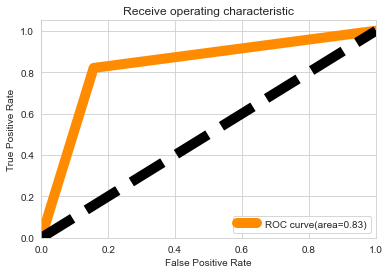

In [281]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test2,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Grid Search [ EXTRA TREES]

In [291]:
# importing library Grid Search CV
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[100,180,200],
             'criterion':['gini', 'entropy', 'log_loss'],
             'min_samples_split': [2,3,4],
             'max_features':['auto','log2', 'None'],
           'random_state':[44,21]}

gsv=GridSearchCV(etc,param_grid=parameters,cv=8)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200, 'random_state': 21} Best Score  0.846944351003093


In [310]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(criterion='log_loss', max_features= 'log2', min_samples_split= 3 ,n_estimators= 180, n_jobs= 2,
                         min_impurity_decrease=0.0000001,random_state=44,class_weight='balanced_subsample',verbose=0,
                         ccp_alpha=0.0001,max_samples=None,min_weight_fraction_leaf=0.00001)

#train and score
etc.fit(x_train,y_train)
etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Training Accuracy_score ",accuracy_score(y_train,pred_train)," Testing Accuracy_score ",accuracy_score(y_test,pred_test))
print("Training Confusion_Matrics ",confusion_matrix(y_train,pred_train)," Testing Confusion Matrics ",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Training Accuracy_score  0.9927518724329548  Testing Accuracy_score  0.851207729468599
Training Confusion_Matrics  [[4068   43]
 [  17 4150]]  Testing Confusion Matrics  [[890 173]
 [135 872]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1063
           1       0.83      0.87      0.85      1007

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### Model Cross Validation Score

In [311]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.8357170467723232 Training Score  0.9927518724329548 Testing Score  0.851207729468599
A cross-fold  3 CV_Score  0.8522466919628037 Training Score  0.9927518724329548 Testing Score  0.851207729468599
A cross-fold  4 CV_Score  0.85436799381523 Training Score  0.9927518724329548 Testing Score  0.851207729468599
A cross-fold  5 CV_Score  0.8558242096931234 Training Score  0.9927518724329548 Testing Score  0.851207729468599
A cross-fold  6 CV_Score  0.8551482901240796 Training Score  0.9927518724329548 Testing Score  0.851207729468599
A cross-fold  7 CV_Score  0.8574720355222487 Training Score  0.9927518724329548 Testing Score  0.851207729468599
A cross-fold  8 CV_Score  0.8560250713926254 Training Score  0.9927518724329548 Testing Score  0.851207729468599
A cross-fold  9 CV_Score  0.8573700298095803 Training Score  0.9927518724329548 Testing Score  0.851207729468599


### Selected Cross Fold-7 as cv score is close to Testing Score

In [312]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=7)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_mean  0.8574720355222487 Testing Accuracy Score  0.851207729468599


### Model_AUC_ROC_Graph

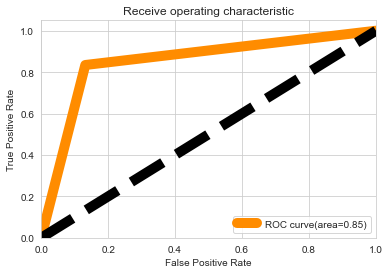

In [313]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

### However Both the Models are working I would select Extra Tress Classifier at the best of 85 percentage

- Selecting Extra Trees as Training score little better along with cv score is better

- cv score increased Present CV_Score is 85.74 got increased after Hyperparameter.

# Saving Model

In [314]:
import pickle
pickle.dump(etc,open('churn.pkl','wb'))

In [315]:
# Loading Model Model
import pickle
loaded_model =pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.1207729468599


In [316]:
model_churn=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
model_churn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021